In [1]:
import numpy as np
import pandas as pd

In [2]:
train_raw = pd.read_csv('data/raw/UNSW_NB15_training-set.csv')
test_raw = pd.read_csv('data/raw/UNSW_NB15_testing-set.csv')

In [3]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [4]:
train_raw.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [6]:
train_raw.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [7]:
train_columns = pd.DataFrame({
    'name': train_raw.columns,
    'description': [''] * len(train_raw.columns)  # or [None] * len(...)
})

In [8]:
train_columns.to_csv('data/dictionary.csv', index=False)

In [9]:
train_raw.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [10]:
train_raw.select_dtypes(include = 'float64').describe()

,dur,rate,sload,dload,sinpkt,dinpkt,sjit,djit,tcprtt,synack,ackdat
count,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,9.540619e+04,7.345403e+07,6.712056e+05,985.976864,88.216296,4.976254e+03,604.353826,0.041396,0.021020,0.020375
std,6.480249,1.654010e+05,1.883574e+08,2.421312e+06,7242.245841,987.093195,4.496585e+04,4061.043281,0.079354,0.043400,0.040506
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000008,3.278614e+01,1.305334e+04,0.000000e+00,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,0.001582,3.225807e+03,8.796748e+05,1.447023e+03,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,0.668069,1.250000e+05,8.888889e+07,2.784487e+04,55.156896,51.053000,2.513295e+03,114.990625,0.065481,0.023268,0.038906
max,59.999989,1.000000e+06,5.988000e+09,2.242273e+07,84371.496000,56716.824000,1.460480e+06,289388.269700,2.518893,2.100352,1.520884


In [11]:
train_raw.select_dtypes(include = 'int64').describe()

,id,spkts,dpkts,sbytes,dbytes,sttl,dttl,sloss,dloss,swin,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,20.298664,18.969591,8.844844e+03,1.492892e+04,179.546997,79.609567,4.953000,6.948010,116.257339,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,136.887597,110.258271,1.747656e+05,1.436542e+05,102.940011,110.506863,66.005059,52.732999,127.001024,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,2.000000,0.000000,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,2.000000,2.000000,4.300000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,12.000000,10.000000,1.418000e+03,1.102000e+03,254.000000,252.000000,3.000000,2.000000,255.000000,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,9616.000000,10974.000000,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,255.000000,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [12]:
train_raw.isnull().sum().sum()

np.int64(0)

In [13]:
train_raw.select_dtypes(include = 'object').describe()

,proto,service,state,attack_cat
count,175341,175341,175341,175341
unique,133,13,9,10
top,tcp,-,INT,Normal
freq,79946,94168,82275,56000


In [14]:
train_raw.duplicated().sum()

np.int64(0)

In [15]:
test_raw.duplicated().sum()

np.int64(0)

In [16]:
def find_equal_columns(df):
    equal_cols = []
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            col1, col2 = cols[i], cols[j]
            if df[col1].equals(df[col2]):
                equal_cols.append((col1, col2))
    return equal_cols

In [17]:
find_equal_columns(train_raw)

[('is_ftp_login', 'ct_ftp_cmd')]

In [18]:
find_equal_columns(test_raw)

[]

In [19]:
test_raw.select_dtypes(include = 'int64').describe()

,id,spkts,dpkts,sbytes,dbytes,sttl,dttl,sloss,dloss,swin,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.00000,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,18.666472,17.545936,7.993908e+03,1.323379e+04,180.967667,95.713003,4.753692,6.308556,133.45908,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,133.916353,115.574086,1.716423e+05,1.514715e+05,101.513358,116.667722,64.649620,55.708021,127.35700,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,2.000000,0.000000,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,6.000000,2.000000,5.340000e+02,1.780000e+02,254.000000,29.000000,1.000000,0.000000,255.00000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,12.000000,10.000000,1.280000e+03,9.560000e+02,254.000000,252.000000,3.000000,2.000000,255.00000,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,10646.000000,11018.000000,1.435577e+07,1.465753e+07,255.000000,253.000000,5319.000000,5507.000000,255.00000,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [20]:
pd.crosstab(train_raw['is_ftp_login'], train_raw['ct_ftp_cmd'])

ct_ftp_cmd,0,1,2,4
is_ftp_login,,,,
0,172774,0,0,0
1,0,2545,0,0
2,0,0,6,0
4,0,0,0,16


In [21]:
pd.crosstab(test_raw['is_ftp_login'], test_raw['ct_ftp_cmd'])

ct_ftp_cmd,0,1,2
is_ftp_login,,,
0,81652,2,0
1,0,668,6
2,0,0,4


**is_ftp_login** might be corrupted.

## Target

In [22]:
train_raw['label'].value_counts()

label
1    119341
0     56000
Name: count, dtype: int64

<Axes: xlabel='label'>

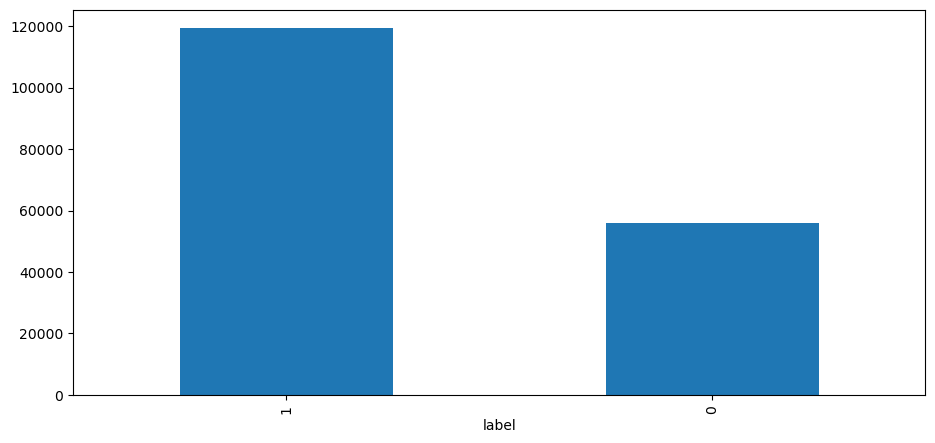

In [23]:
train_raw['label'].value_counts().plot.bar(figsize = (11, 5))

In [24]:
100 * train_raw['label'].value_counts() / train_raw.shape[0]

label
1    68.062233
0    31.937767
Name: count, dtype: float64

In [25]:
train_raw['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

<Axes: xlabel='attack_cat'>

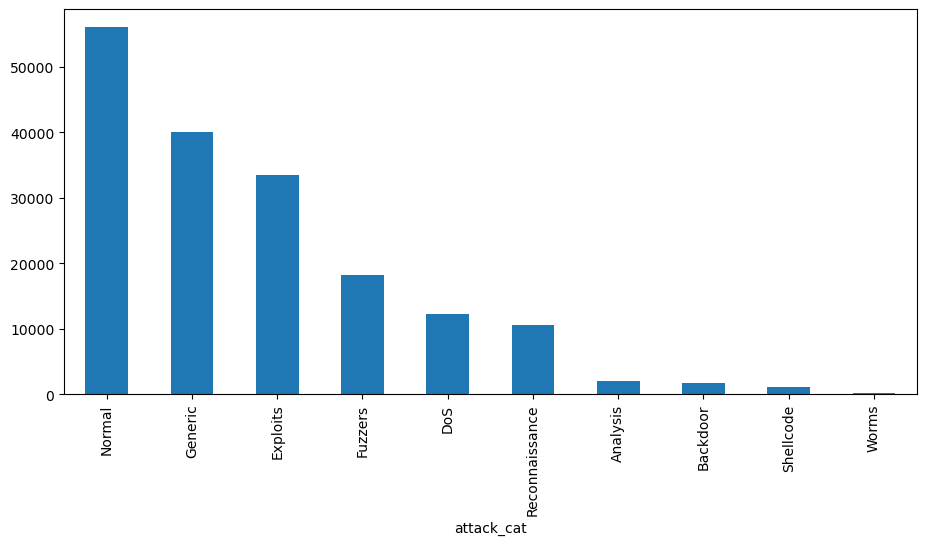

In [26]:
train_raw['attack_cat'].value_counts().plot.bar(figsize = (11, 5))

In [27]:
100 * train_raw['attack_cat'].value_counts() / train_raw.shape[0]

attack_cat
Normal            31.937767
Generic           22.812691
Exploits          19.044605
Fuzzers           10.370649
DoS                6.994371
Reconnaissance     5.983198
Analysis           1.140635
Backdoor           0.995774
Shellcode          0.646169
Worms              0.074141
Name: count, dtype: float64

In [28]:
test_raw['attack_cat'].value_counts()

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

<Axes: xlabel='attack_cat'>

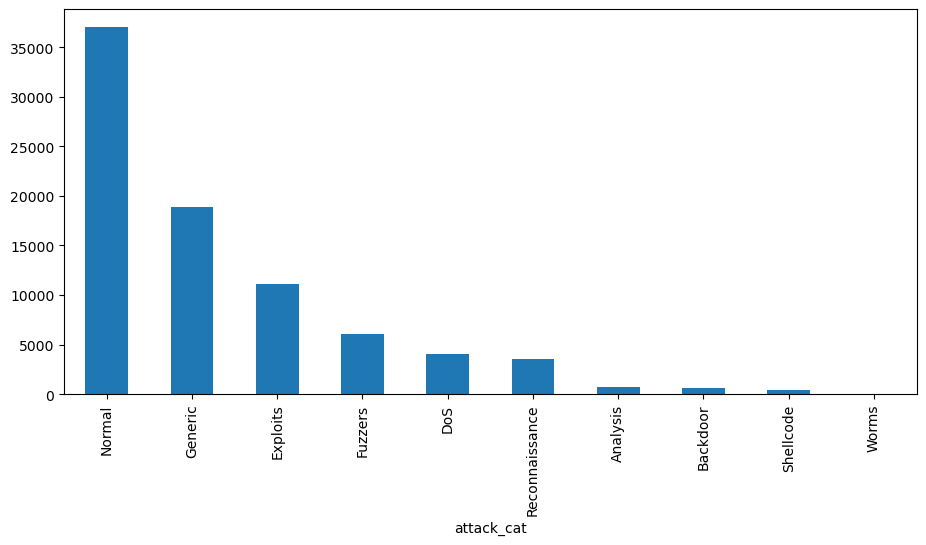

In [29]:
test_raw['attack_cat'].value_counts().plot.bar(figsize = (11, 5))

In [30]:
100 * test_raw['attack_cat'].value_counts() / test_raw.shape[0]

attack_cat
Normal            44.939999
Generic           22.920614
Exploits          13.520867
Fuzzers            7.362872
DoS                4.966477
Reconnaissance     4.246223
Analysis           0.822281
Backdoor           0.708109
Shellcode          0.459117
Worms              0.053442
Name: count, dtype: float64

In [31]:
train = train_raw[train_raw['attack_cat'].isin(['Normal', 'DoS'])].copy()
test = test_raw[test_raw['attack_cat'].isin(['Normal', 'DoS'])].copy()

train['label'] = (train['attack_cat'] == 'DoS').astype(int)
test['label'] = (train['attack_cat'] == 'DoS').astype(int)

train.drop(['id', 'attack_cat'], axis=1, inplace=True)
test.drop(['id', 'attack_cat'], axis=1, inplace=True)

In [32]:
print(train['label'].value_counts())
print(test['label'].value_counts())

label
0    56000
1    12264
Name: count, dtype: int64
label
0.0    25497
1.0     2368
Name: count, dtype: int64


## Categorical and binary features

In [33]:
train['proto'].value_counts()

proto
tcp     41402
udp     14280
unas     4080
arp      2859
ospf      790
        ...  
iplt       34
ib         34
igmp       18
icmp       15
rtp         1
Name: count, Length: 133, dtype: int64

In [34]:
train['proto'].unique()

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'encap',
       'gmtp', 'ifmp', 'aris', 'pim', 'qnx', 'scps', 'a/n', 'ipcomp',
       'pgm', 'zero', 'ddx', 'stp', 'srp', 'uti', 'smp', 'fire', 'isis',
       'crtp', 'sps', 'fc', 'rsvp', 'unas', 'sctp', 'ggp', 'ipnip', 'st2',
       'bbn-rcc', 'egp', 'emcon', 'igp', 'nvp', 'xnet', 'chaos', 'prm',
       'trunk-1', 'xns-idp', 'leaf-1', 'rdp', 'irtp', 'iso-tp4',
       'mfe-nsp', '3pc', 'sep', 'idpr', 'xtp', 'idpr-cmtp', 'tp++', 'il',
       'sdrp', 'ipv6-route', 'idrp', 'gre', 'mhrp', 'mobile', 'skip',
       'pup', 'ipv6-no', 'ipv6-opts', 'dcn', 'hmp', 'sat-expak',
       'trunk-2', 'any', 'ippc', 'netblt', 'merit-inp', 'wsn', 'pvp',
       'ipv6', 'sun-nd', 'wb-mon', 'bna', 'iso-ip', 'rvd', 'secure-vmtp',
       'vmtp', 'ttp', 'narp', 'vines', 'tlsp', 'dgp', 'tcf', 'cftp',
       'sprite-rpc', 'mtp', 'kryptolan', 'ax.25', 'ipip', 'aes-sp3-d',
       'micp', 'sat-mon', 'visa', 'mux', 'ip', 'leaf-2', 'ipv6-frag',
       'i-nlsp

<Axes: xlabel='proto'>

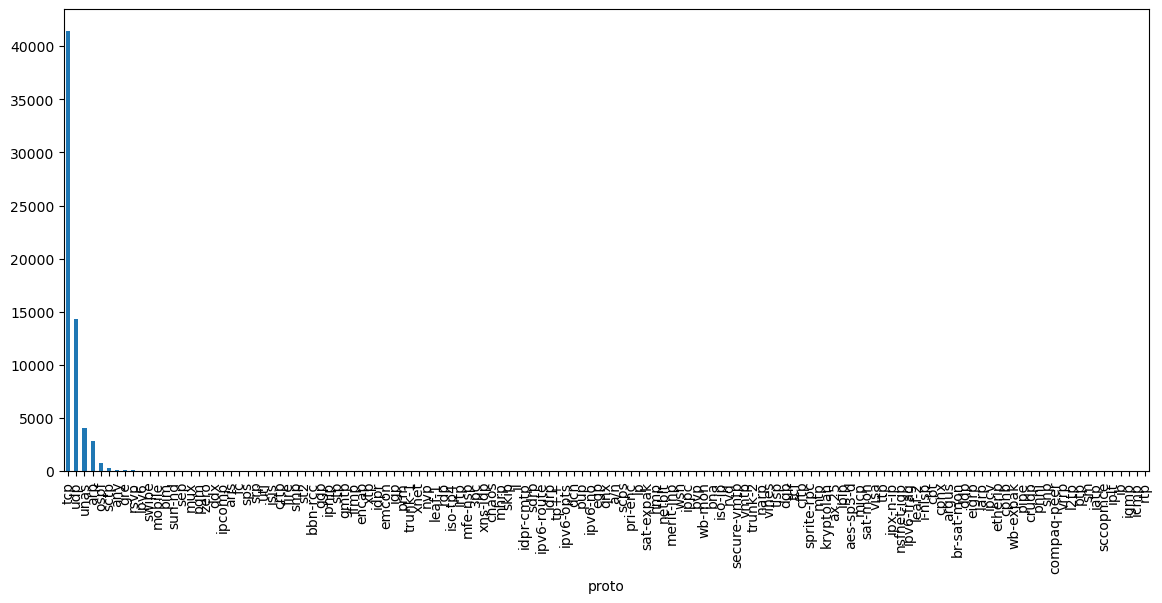

In [35]:
train['proto'].value_counts().plot.bar(figsize = (14, 6))

In [36]:
train['service'].value_counts()

service
-           46985
dns          7600
http         6564
ftp-data     2560
smtp         1874
ssh          1291
ftp          1268
pop3           65
dhcp           33
snmp           14
irc             4
ssl             4
radius          2
Name: count, dtype: int64

<Axes: xlabel='service'>

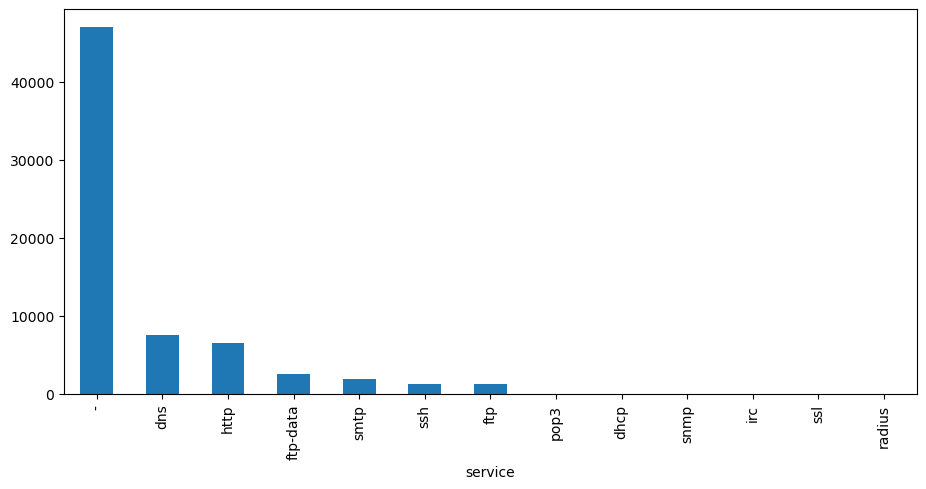

In [37]:
train['service'].value_counts().plot.bar(figsize = (11, 5))

In [38]:
train['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no'],
      dtype=object)

In [39]:
train['state'].value_counts()

state
FIN    39391
INT    15236
CON    12394
REQ     1155
RST       73
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64

<Axes: xlabel='state'>

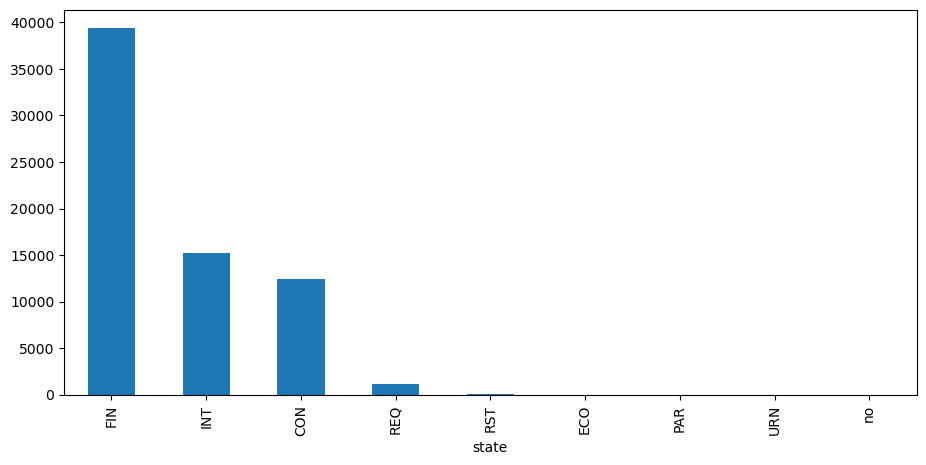

In [40]:
train['state'].value_counts().plot.bar(figsize = (11, 5))

In [41]:
train['is_ftp_login'].value_counts()

is_ftp_login
0    67298
1      964
2        2
Name: count, dtype: int64

<Axes: xlabel='is_ftp_login'>

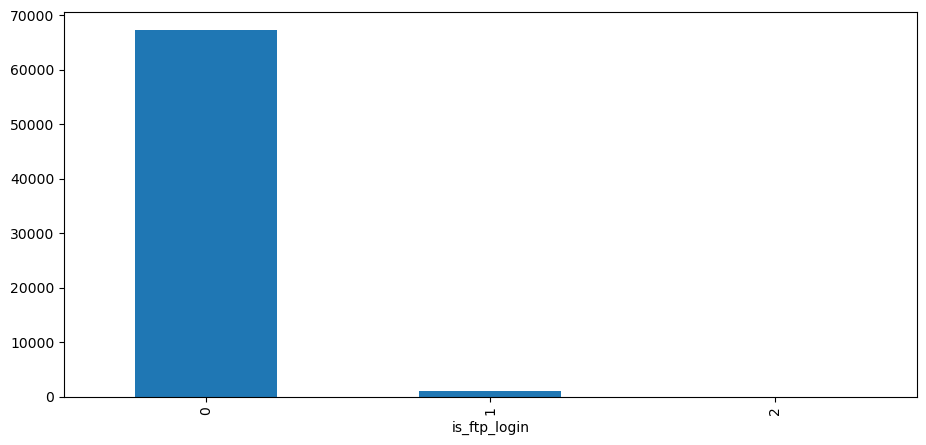

In [42]:
train['is_ftp_login'].value_counts().plot.bar(figsize = (11, 5))

Remove is_ftp_login

In [43]:
train.drop(['is_ftp_login'], axis=1, inplace=True)
test.drop(['is_ftp_login'], axis=1, inplace=True)

In [44]:
train['is_sm_ips_ports'].value_counts()

is_sm_ips_ports
0    65502
1     2762
Name: count, dtype: int64

<Axes: xlabel='is_sm_ips_ports'>

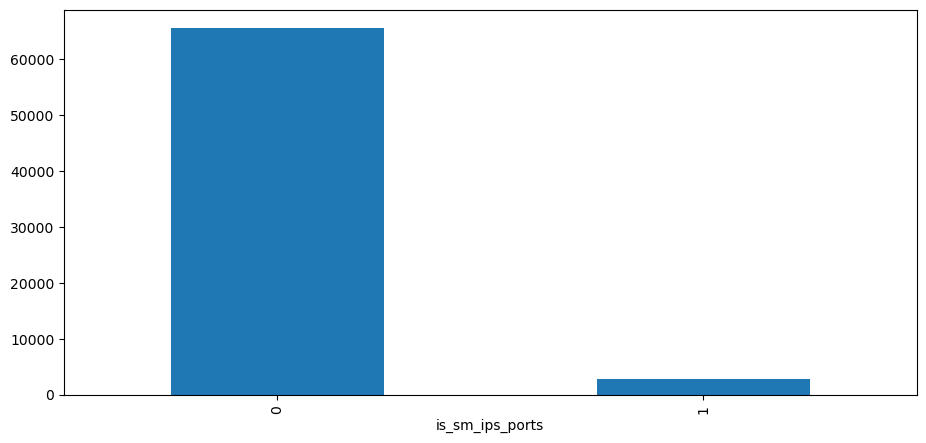

In [45]:
train['is_sm_ips_ports'].value_counts().plot.bar(figsize = (11, 5))

In [46]:
proto_service_ct = pd.crosstab(train['proto'], train['service'])
proto_service_ct

service,-,dhcp,dns,ftp,ftp-data,http,irc,pop3,radius,smtp,snmp,ssh,ssl
proto,,,,,,,,,,,,,
3pc,34,0,0,0,0,0,0,0,0,0,0,0,0
a/n,34,0,0,0,0,0,0,0,0,0,0,0,0
aes-sp3-d,34,0,0,0,0,0,0,0,0,0,0,0,0
any,102,0,0,0,0,0,0,0,0,0,0,0,0
argus,34,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
wsn,34,0,0,0,0,0,0,0,0,0,0,0,0
xnet,34,0,0,0,0,0,0,0,0,0,0,0,0
xns-idp,34,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

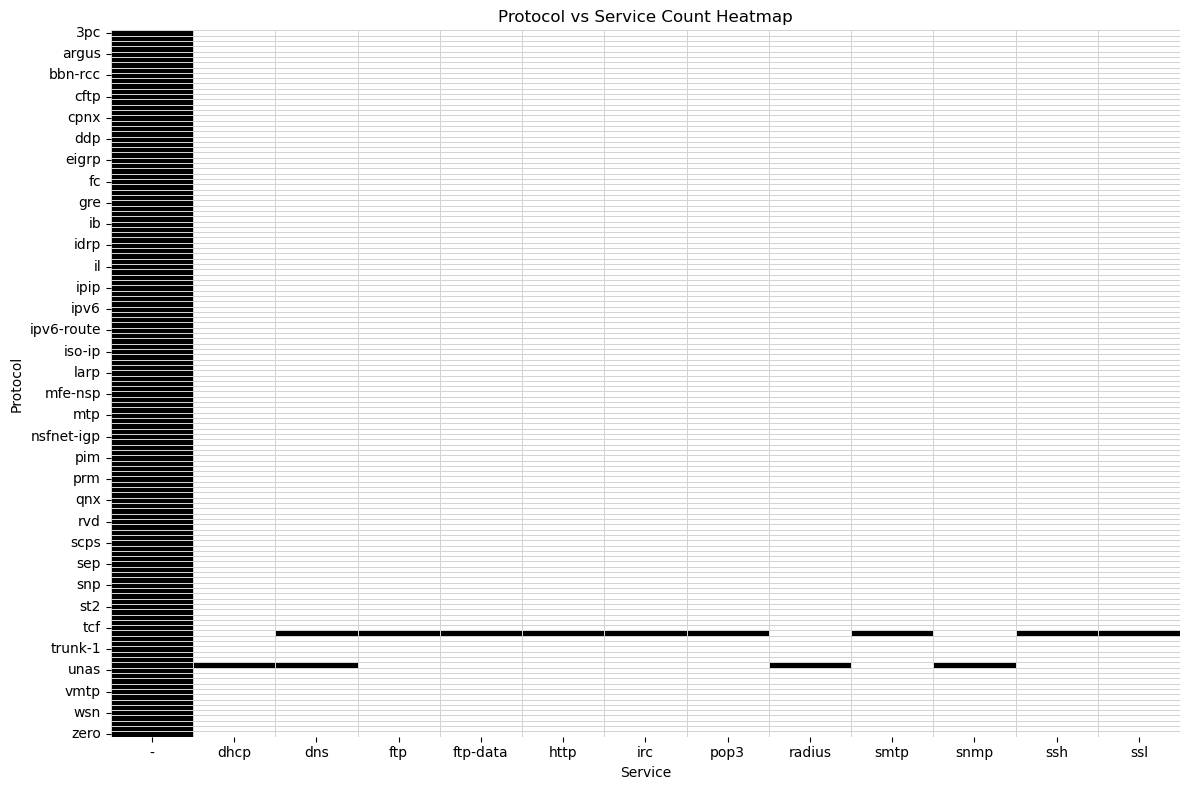

In [48]:
proto_service_ct_flg = (proto_service_ct > 0).astype(int)

plt.figure(figsize = (12, 8))  
sns.heatmap(proto_service_ct_flg, cmap = "Greys", cbar = False, linewidths = 0.5, linecolor = 'lightgrey')
plt.title("Protocol vs Service Count Heatmap")
plt.xlabel("Service")
plt.ylabel("Protocol")
plt.tight_layout()
plt.show()

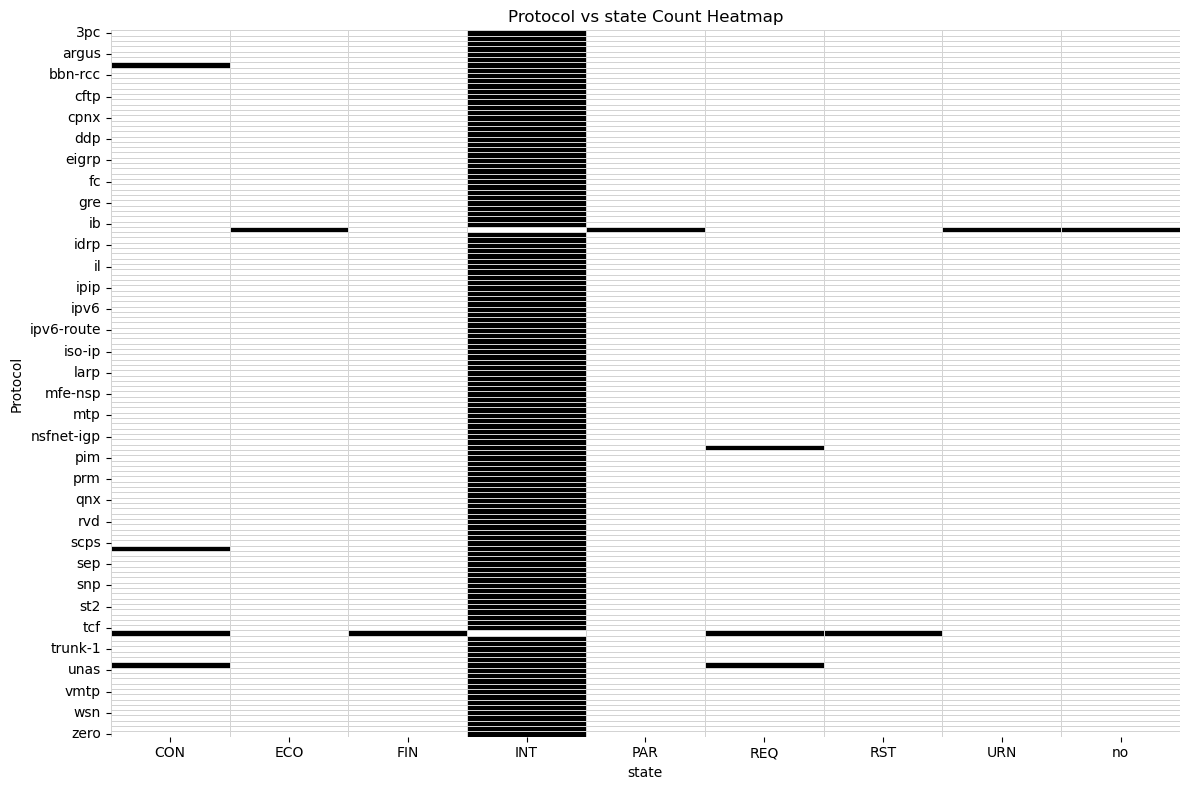

In [49]:
proto_state_ct = pd.crosstab(train['proto'], train['state'])
proto_state_ct_flg = (proto_state_ct > 0).astype(int)

plt.figure(figsize = (12, 8))  
sns.heatmap(proto_state_ct_flg, cmap = "Greys", cbar = False, linewidths = 0.5, linecolor = 'lightgrey')
plt.title("Protocol vs state Count Heatmap")
plt.xlabel("state")
plt.ylabel("Protocol")
plt.tight_layout()
plt.show()

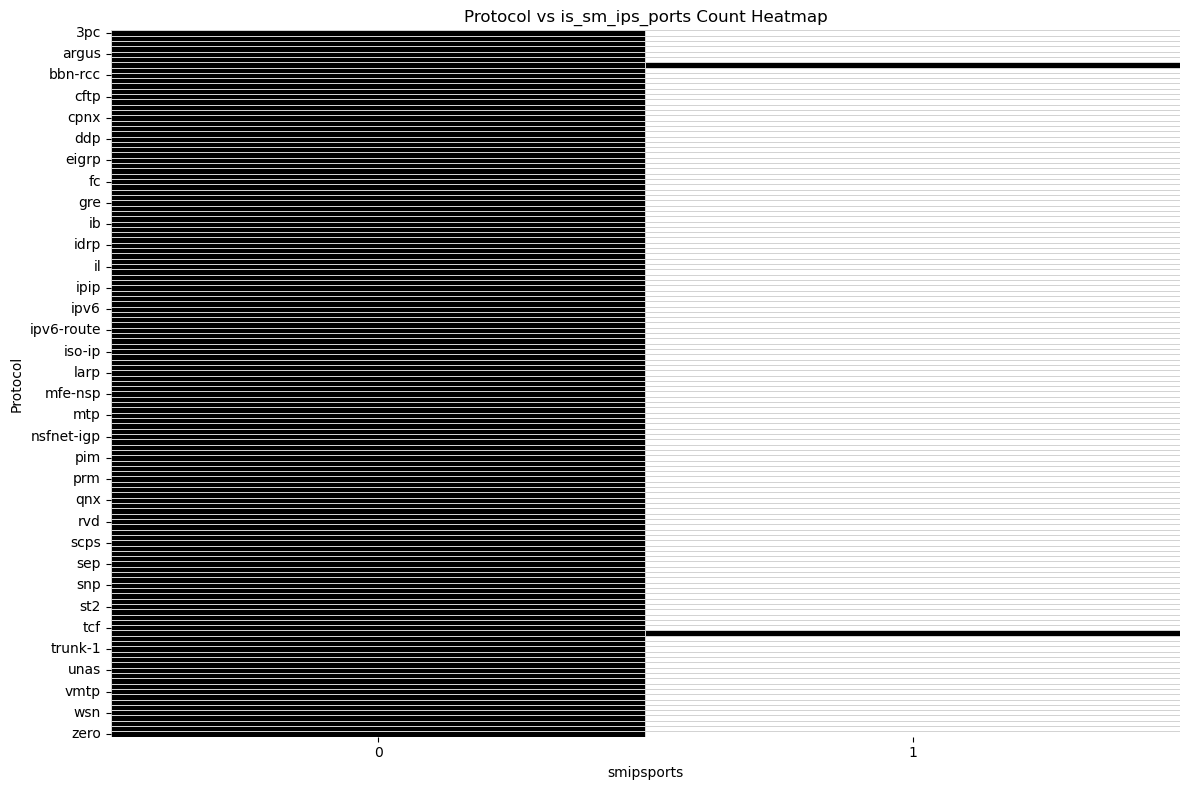

In [50]:
proto_smipsports_ct = pd.crosstab(train['proto'], train['is_sm_ips_ports'])
proto_smipsports_ct_flg = (proto_smipsports_ct > 0).astype(int)

plt.figure(figsize = (12, 8))  
sns.heatmap(proto_smipsports_ct_flg, cmap = "Greys", cbar = False, linewidths = 0.5, linecolor = 'lightgrey')
plt.title("Protocol vs is_sm_ips_ports Count Heatmap")
plt.xlabel("smipsports")
plt.ylabel("Protocol")
plt.tight_layout()
plt.show()

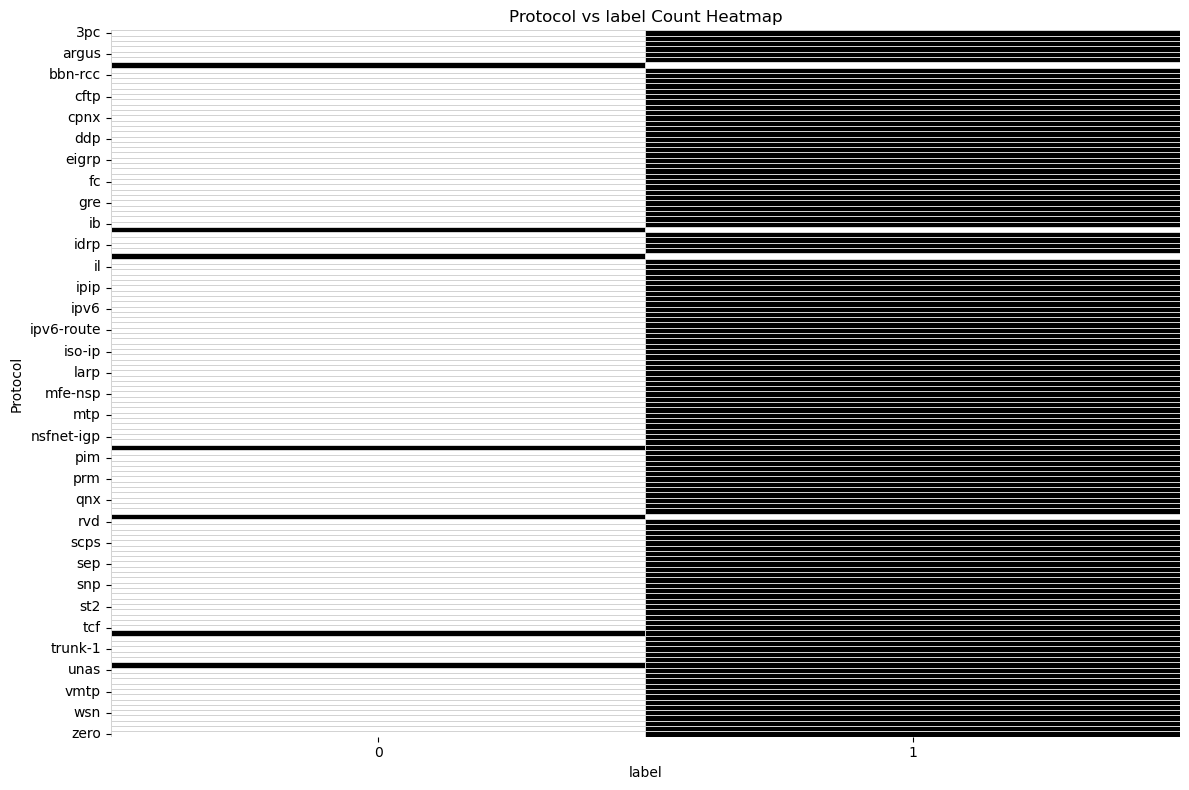

In [51]:
proto_label_ct = pd.crosstab(train['proto'], train['label'])
proto_label_ct_flg = (proto_label_ct > 0).astype(int)

plt.figure(figsize = (12, 8))  
sns.heatmap(proto_label_ct_flg, cmap = "Greys", cbar = False, linewidths = 0.5, linecolor = 'lightgrey')
plt.title("Protocol vs label Count Heatmap")
plt.xlabel("label")
plt.ylabel("Protocol")
plt.tight_layout()
plt.show()

In [52]:
pd.crosstab(train['service'], train['state'])

state,CON,ECO,FIN,INT,PAR,REQ,RST,URN,no
service,,,,,,,,,
-,4876,12,25765,15112,1,1155,62,1,1
dhcp,8,0,0,25,0,0,0,0,0
dns,7493,0,24,83,0,0,0,0,0
ftp,1,0,1267,0,0,0,0,0,0
ftp-data,0,0,2560,0,0,0,0,0,0
http,7,0,6556,0,0,0,1,0,0
irc,0,0,4,0,0,0,0,0,0
pop3,3,0,62,0,0,0,0,0,0
radius,0,0,0,2,0,0,0,0,0


In [53]:
pd.crosstab(train['service'], train['is_sm_ips_ports'])

is_sm_ips_ports,0,1
service,,
-,44223,2762
dhcp,33,0
dns,7600,0
ftp,1268,0
ftp-data,2560,0
http,6564,0
irc,4,0
pop3,65,0
radius,2,0


In [54]:
pd.crosstab(train['service'], train['label'])

label,0,1
service,,
-,36512,10473
dhcp,0,33
dns,7493,107
ftp,1218,50
ftp-data,2552,8
http,5348,1216
irc,0,4
pop3,4,61
radius,2,0


In [55]:
pd.crosstab(train['state'], train['is_sm_ips_ports'])

is_sm_ips_ports,0,1
state,,
CON,12394,0
ECO,12,0
FIN,39391,0
INT,12476,2760
PAR,1,0
REQ,1153,2
RST,73,0
URN,1,0
no,1,0


In [56]:
pd.crosstab(train['state'], train['label'])

label,0,1
state,,
CON,12099,295
ECO,12,0
FIN,37175,2216
INT,5715,9521
PAR,1,0
REQ,925,230
RST,71,2
URN,1,0
no,1,0


In [57]:
pd.crosstab(train['is_sm_ips_ports'], train['label'])

label,0,1
is_sm_ips_ports,,
0,53238,12264
1,2762,0


In [58]:
train.shape

(68264, 42)

In [59]:
train['service'] = train['service'].apply(lambda x: 'rare' if x == '-' else x)
train['state'] = train['state'].apply(lambda x: 'rare' if x == 'no' else x.lower())

#### proto

In [60]:
proto_counts = train_raw['proto'].value_counts()
proto_cumu = 100 * proto_counts.cumsum() / proto_counts.sum()
proto_cumu

proto
tcp        45.594584
udp        81.685972
unas       88.577686
arp        90.208223
ospf       91.688196
             ...    
argus      99.924718
netblt     99.980609
igmp       99.990875
icmp       99.999430
rtp       100.000000
Name: count, Length: 133, dtype: float64

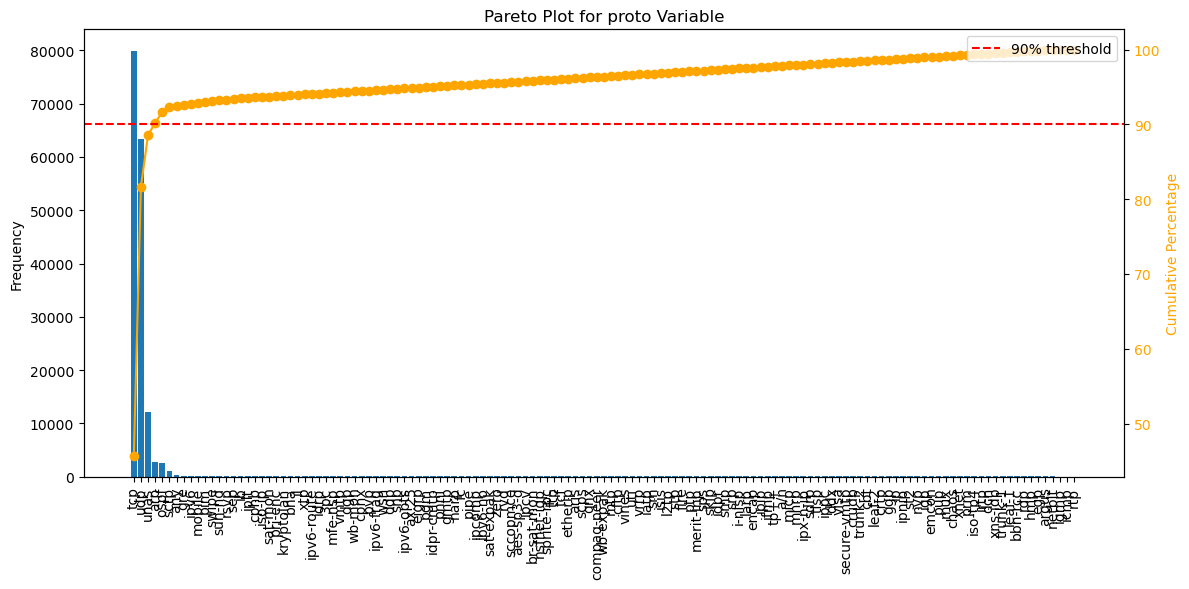

In [61]:
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.bar(proto_counts.index, proto_counts.values)
ax1.set_ylabel('Frequency')
ax1.tick_params(axis = 'y')
ax1.set_xticks(range(len(proto_counts)))
ax1.set_xticklabels(proto_counts.index, rotation = 90)

ax2 = ax1.twinx()
ax2.plot(proto_counts.index, proto_cumu.values, color = 'orange', marker = 'o')
ax2.set_ylabel('Cumulative Percentage', color = 'orange')
ax2.tick_params(axis = 'y', labelcolor = 'orange')
ax2.axhline(90, color = 'red', linestyle = '--', label = '90% threshold')
ax2.legend(loc = 'upper right')

plt.title('Pareto Plot for proto Variable')
plt.tight_layout()
plt.show()

plt.show()

In [62]:
proto_top = proto_cumu.index.tolist()[:4]

train['proto'] = train['proto'].apply(lambda x: x if x in proto_top else 'other')

In [63]:
train['proto'].value_counts()

proto
tcp      41402
udp      14280
other     5643
unas      4080
arp       2859
Name: count, dtype: int64

In [64]:
service_counts = train['service'].value_counts()
service_cumu = 100 * service_counts.cumsum() / service_counts.sum()
service_cumu

service
rare         68.828372
dns          79.961620
http         89.577230
ftp-data     93.327376
smtp         96.072600
ssh          97.963788
ftp          99.821282
pop3         99.916501
dhcp         99.964842
snmp         99.985351
irc          99.991211
ssl          99.997070
radius      100.000000
Name: count, dtype: float64

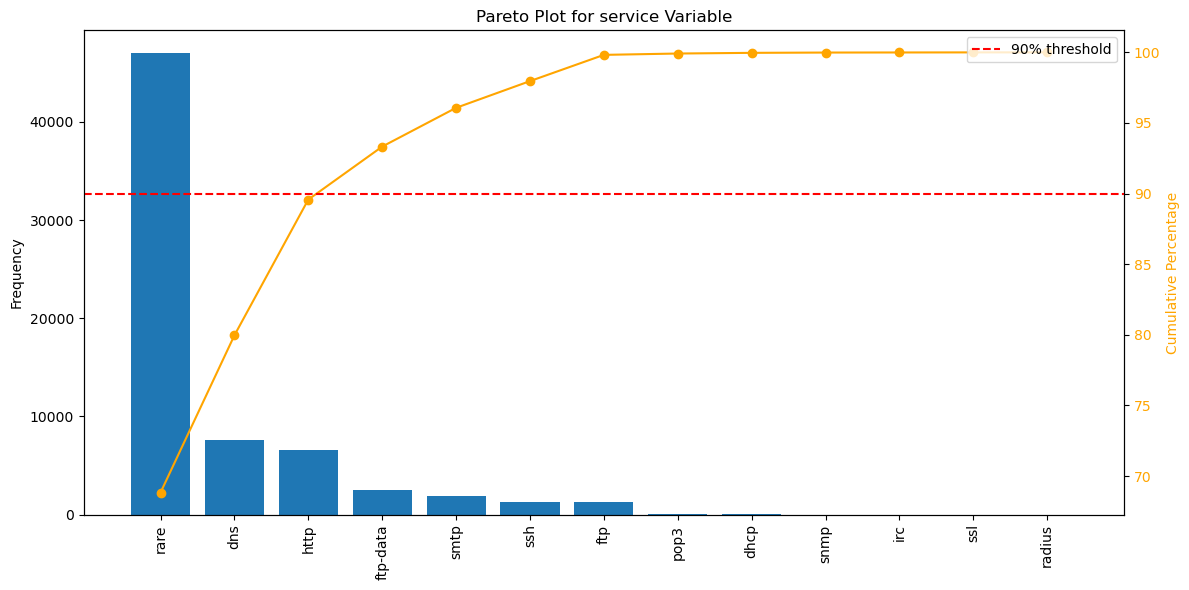

In [65]:
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.bar(service_counts.index, service_counts.values)
ax1.set_ylabel('Frequency')
ax1.tick_params(axis = 'y')
ax1.set_xticks(range(len(service_counts)))
ax1.set_xticklabels(service_counts.index, rotation = 90)

ax2 = ax1.twinx()
ax2.plot(service_counts.index, service_cumu.values, color = 'orange', marker = 'o')
ax2.set_ylabel('Cumulative Percentage', color = 'orange')
ax2.tick_params(axis = 'y', labelcolor = 'orange')
ax2.axhline(90, color = 'red', linestyle = '--', label = '90% threshold')
ax2.legend(loc = 'upper right')

plt.title('Pareto Plot for service Variable')
plt.tight_layout()
plt.show()

plt.show()

In [66]:
service_top = service_cumu.index.tolist()[:3]

train['service'] = train['service'].apply(lambda x: x if x in service_top else 'other')

In [67]:
train['service'].value_counts()

service
rare     46985
dns       7600
other     7115
http      6564
Name: count, dtype: int64

In [68]:
train.select_dtypes(include = 'object').describe()

,proto,service,state
count,68264,68264,68264
unique,5,4,9
top,tcp,rare,fin
freq,41402,46985,39391


In [69]:
state_counts = train['state'].value_counts()
state_cumu = 100 * state_counts.cumsum() / state_counts.sum()
state_cumu

state
fin      57.703914
int      80.023145
con      98.179128
req      99.871089
rst      99.978026
eco      99.995605
par      99.997070
urn      99.998535
rare    100.000000
Name: count, dtype: float64

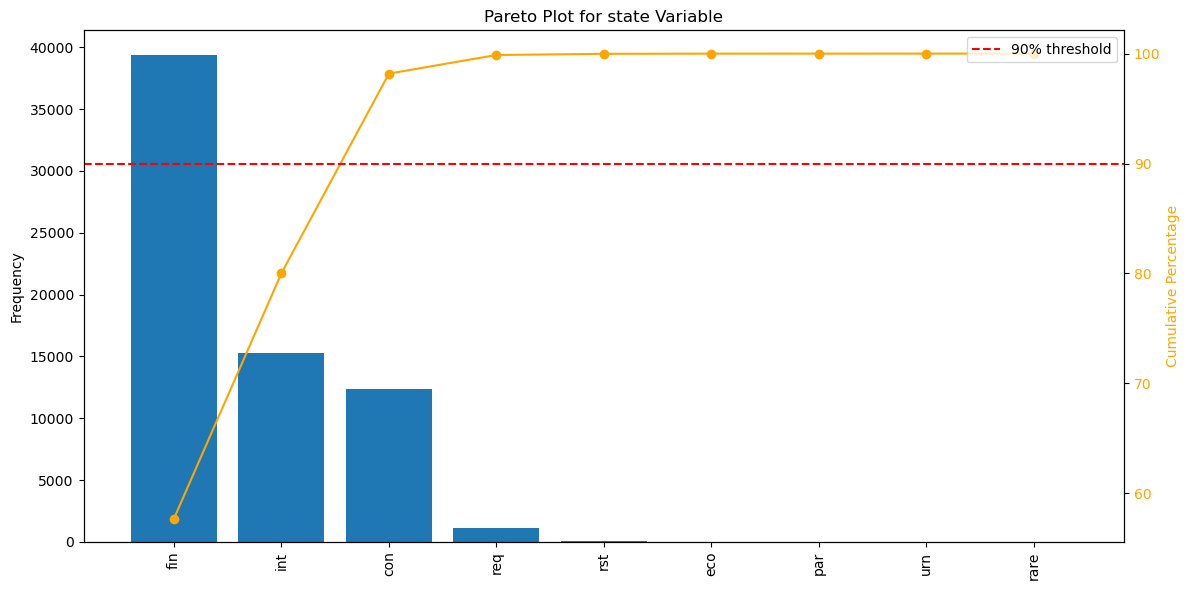

In [70]:
fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.bar(state_counts.index, state_counts.values)
ax1.set_ylabel('Frequency')
ax1.tick_params(axis = 'y')
ax1.set_xticks(range(len(state_counts)))
ax1.set_xticklabels(state_counts.index, rotation = 90)

ax2 = ax1.twinx()
ax2.plot(state_counts.index, state_cumu.values, color = 'orange', marker = 'o')
ax2.set_ylabel('Cumulative Percentage', color = 'orange')
ax2.tick_params(axis = 'y', labelcolor = 'orange')
ax2.axhline(90, color = 'red', linestyle = '--', label = '90% threshold')
ax2.legend(loc = 'upper right')

plt.title('Pareto Plot for state Variable')
plt.tight_layout()
plt.show()

plt.show()

In [71]:
state_top = state_cumu.index.tolist()[:3]

train['state'] = train['state'].apply(lambda x: x if x in state_top else 'other')

In [72]:
train['state'].value_counts()

state
fin      39391
int      15236
con      12394
other     1243
Name: count, dtype: int64

In [73]:
train.select_dtypes(include = 'object').describe()

,proto,service,state
count,68264,68264,68264
unique,5,4,4
top,tcp,rare,fin
freq,41402,46985,39391


In [74]:
pd.crosstab(train['proto'], train['service'])

service,dns,http,other,rare
proto,,,,
arp,0,0,0,2859
other,0,0,0,5643
tcp,24,6564,7066,27748
udp,7576,0,49,6655
unas,0,0,0,4080


In [75]:
pd.crosstab(train['proto'], train['state'])

state,con,fin,int,other
proto,,,,
arp,90,0,2769,0
other,143,0,5195,305
tcp,1082,39391,0,929
udp,11079,0,3192,9
unas,0,0,4080,0


In [76]:
pd.crosstab(train['proto'], train['is_sm_ips_ports'])

is_sm_ips_ports,0,1
proto,,
arp,99,2760
other,5643,0
tcp,41400,2
udp,14280,0
unas,4080,0


In [77]:
pd.crosstab(train['proto'], train['label'])

label,0,1
proto,,
arp,2859,0
other,98,5545
tcp,39121,2281
udp,13922,358
unas,0,4080


In [78]:
pd.crosstab(train['service'], train['state'])

state,con,fin,int,other
service,,,,
dns,7493,24,83,0
http,7,6556,0,1
other,18,7046,41,10
rare,4876,25765,15112,1232


In [79]:
pd.crosstab(train['service'], train['is_sm_ips_ports'])

is_sm_ips_ports,0,1
service,,
dns,7600,0
http,6564,0
other,7115,0
rare,44223,2762


In [80]:
pd.crosstab(train['state'], train['is_sm_ips_ports'])

is_sm_ips_ports,0,1
state,,
con,12394,0
fin,39391,0
int,12476,2760
other,1241,2


In [81]:
from scipy.stats import chi2_contingency
import seaborn as sns

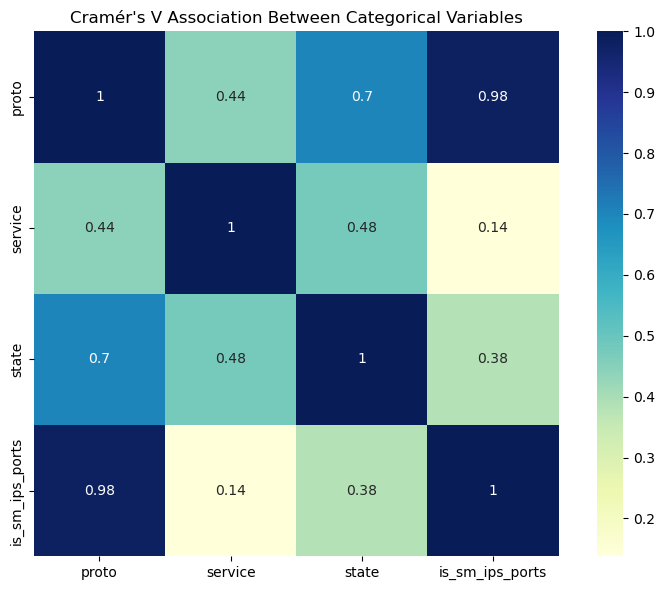

In [82]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))

cat_cols = ['proto', 'service', 'state', 'is_sm_ips_ports']

cramers_results = pd.DataFrame(index = cat_cols, columns = cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0  # Perfect association with self
        else:
            v = cramers_v(train[col1], train[col2])
            cramers_results.loc[col1, col2] = round(v, 3)

cramers_results = cramers_results.astype(float)

plt.figure(figsize = (8, 6))
sns.heatmap(cramers_results, annot = True, cmap = "YlGnBu", square = True)
plt.title("Cramér's V Association Between Categorical Variables")
plt.tight_layout()
plt.show()

In [83]:
proto_ct = pd.crosstab(train['proto'], train['label'])
proto_pct_ct = proto_ct.div(proto_ct.sum(axis = 1), axis = 0) * 100
proto_pct_ct

label,0,1
proto,,
arp,100.000000,0.000000
other,1.736665,98.263335
tcp,94.490604,5.509396
udp,97.492997,2.507003
unas,0.000000,100.000000


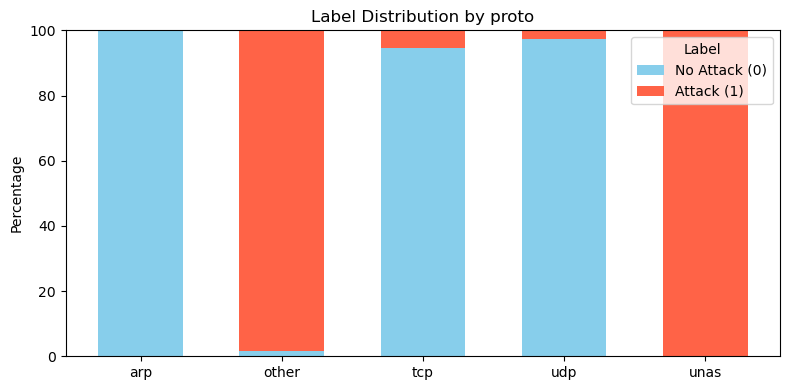

In [84]:
proto_categories = proto_pct_ct.index.tolist()
bar_width = 0.6
x = np.arange(len(proto_categories))

proto_normal = proto_pct_ct[0].values
proto_attack = proto_pct_ct[1].values

fig, ax = plt.subplots(figsize = (8, 4))

ax.bar(x, proto_normal, bar_width, label = 'No Attack (0)', color = 'skyblue')

ax.bar(x, proto_attack, bar_width, bottom = proto_normal, label = 'Attack (1)', color = 'tomato')

ax.set_ylabel('Percentage')
ax.set_title('Label Distribution by proto')
ax.set_xticks(x)
ax.set_xticklabels(proto_categories)
ax.set_ylim(0, 100)
ax.legend(title = 'Label')
plt.tight_layout()
plt.show()

In [85]:
service_ct = pd.crosstab(train['service'], train['label'])
service_pct_ct = service_ct.div(service_ct.sum(axis = 1), axis = 0) * 100
service_pct_ct

label,0,1
service,,
dns,98.592105,1.407895
http,81.474711,18.525289
other,93.422347,6.577653
rare,77.709907,22.290093


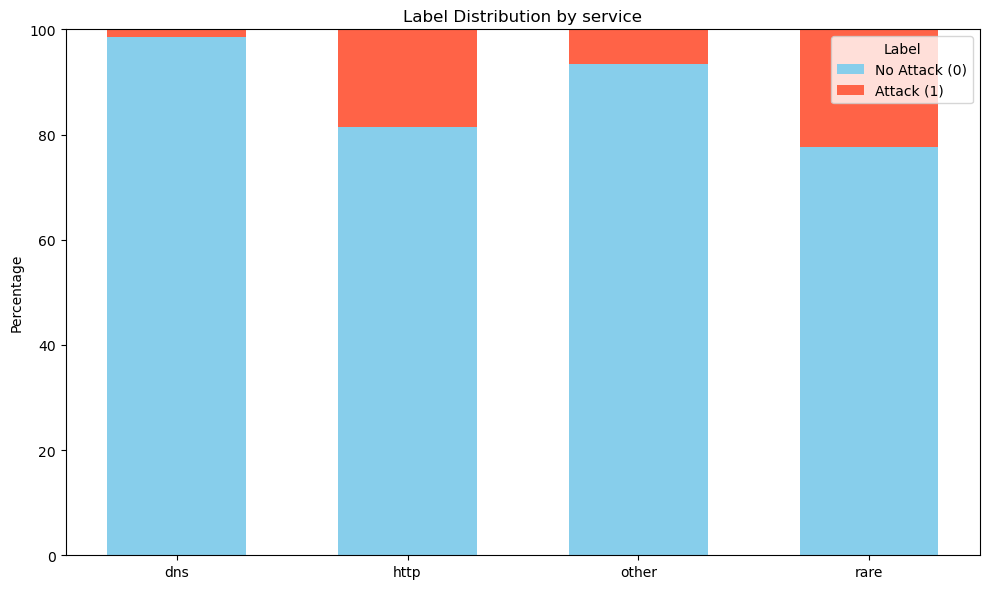

In [86]:
service_categories = service_pct_ct.index.tolist()
bar_width = 0.6
x = np.arange(len(service_categories))

service_normal = service_pct_ct[0].values
service_attack = service_pct_ct[1].values

fig, ax = plt.subplots(figsize = (10, 6))

ax.bar(x, service_normal, bar_width, label = 'No Attack (0)', color = 'skyblue')

ax.bar(x, service_attack, bar_width, bottom = service_normal, label = 'Attack (1)', color = 'tomato')

ax.set_ylabel('Percentage')
ax.set_title('Label Distribution by service')
ax.set_xticks(x)
ax.set_xticklabels(service_categories)
ax.set_ylim(0, 100)
ax.legend(title = 'Label')
plt.tight_layout()
plt.show()

In [87]:
state_ct = pd.crosstab(train['state'], train['label'])
state_pct_ct = state_ct.div(state_ct.sum(axis = 1), axis = 0) * 100
state_pct_ct

label,0,1
state,,
con,97.619816,2.380184
fin,94.374349,5.625651
int,37.509845,62.490155
other,81.335479,18.664521


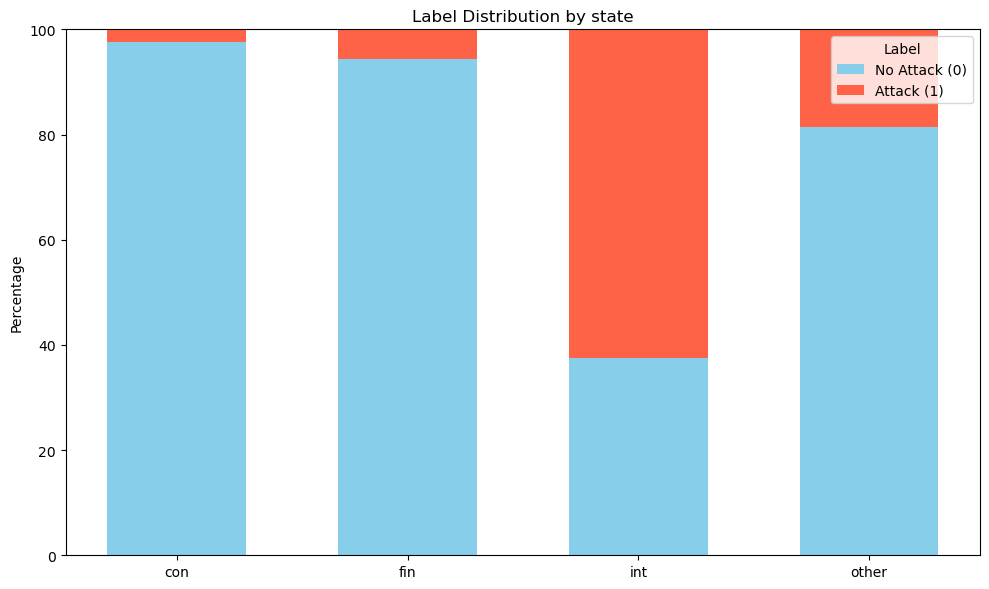

In [88]:
state_categories = state_pct_ct.index.tolist()
bar_width = 0.6
x = np.arange(len(state_categories))

state_normal = state_pct_ct[0].values
state_attack = state_pct_ct[1].values

fig, ax = plt.subplots(figsize = (10, 6))

ax.bar(x, state_normal, bar_width, label = 'No Attack (0)', color = 'skyblue')

ax.bar(x, state_attack, bar_width, bottom = state_normal, label = 'Attack (1)', color = 'tomato')

ax.set_ylabel('Percentage')
ax.set_title('Label Distribution by state')
ax.set_xticks(x)
ax.set_xticklabels(state_categories)
ax.set_ylim(0, 100)
ax.legend(title = 'Label')
plt.tight_layout()
plt.show()

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68264 entries, 0 to 175248
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                68264 non-null  float64
 1   proto              68264 non-null  object 
 2   service            68264 non-null  object 
 3   state              68264 non-null  object 
 4   spkts              68264 non-null  int64  
 5   dpkts              68264 non-null  int64  
 6   sbytes             68264 non-null  int64  
 7   dbytes             68264 non-null  int64  
 8   rate               68264 non-null  float64
 9   sttl               68264 non-null  int64  
 10  dttl               68264 non-null  int64  
 11  sload              68264 non-null  float64
 12  dload              68264 non-null  float64
 13  sloss              68264 non-null  int64  
 14  dloss              68264 non-null  int64  
 15  sinpkt             68264 non-null  float64
 16  dinpkt             68264 n

In [90]:
test['proto'] = test['proto'].apply(lambda x: x if x in proto_top else 'other')
test['service'] = test['service'].apply(lambda x: 'rare' if x == '-' else x)
test['service'] = test['service'].apply(lambda x: x if x in service_top else 'other')
test['state'] = test['state'].apply(lambda x: 'rare' if x == 'no' else x.lower())
test['state'] = test['state'].apply(lambda x: x if x in state_top else 'other')

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41089 entries, 0 to 82331
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                41089 non-null  float64
 1   proto              41089 non-null  object 
 2   service            41089 non-null  object 
 3   state              41089 non-null  object 
 4   spkts              41089 non-null  int64  
 5   dpkts              41089 non-null  int64  
 6   sbytes             41089 non-null  int64  
 7   dbytes             41089 non-null  int64  
 8   rate               41089 non-null  float64
 9   sttl               41089 non-null  int64  
 10  dttl               41089 non-null  int64  
 11  sload              41089 non-null  float64
 12  dload              41089 non-null  float64
 13  sloss              41089 non-null  int64  
 14  dloss              41089 non-null  int64  
 15  sinpkt             41089 non-null  float64
 16  dinpkt             41089 no

## Numerical features

In [92]:
numeric_cols = train.select_dtypes(include = ['int', 'float']).drop(['is_sm_ips_ports', 'label'], axis=1)
numeric_cols.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,1,0,1,1,1,1,0,0,1,1
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,43,1,1,1,1,2,0,0,1,6
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,7,1,2,1,1,3,0,0,2,6
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,1,1,2,1,1,3,1,0,2,1
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,43,1,2,2,1,40,0,0,2,39


In [93]:
numeric_cols.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst
count,68264.000000,68264.000000,68264.000000,6.826400e+04,6.826400e+04,6.826400e+04,68264.000000,68264.000000,6.826400e+04,6.826400e+04,...,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000
mean,1.297037,29.252153,34.578006,6.471102e+03,2.887918e+04,3.855143e+04,103.723793,61.381182,4.169510e+07,1.695026e+06,...,5.481996,0.742368,3.301213,1.845175,1.345438,4.057673,0.014180,0.114848,4.052722,5.294972
std,6.269360,110.873591,151.724319,1.261465e+05,2.008656e+05,1.134359e+05,104.669064,88.955706,1.615804e+08,3.650221e+06,...,5.536825,1.097666,3.200502,2.556313,1.948712,5.205992,0.118482,0.477488,4.146878,5.421910
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.001021,2.000000,2.000000,2.000000e+02,8.600000e+01,3.361857e+01,31.000000,29.000000,1.333503e+04,5.783970e+02,...,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,0.026985,10.000000,8.000000,9.300000e+02,3.540000e+02,1.767968e+03,31.000000,29.000000,5.108055e+05,6.915629e+04,...,4.000000,0.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,3.000000,4.000000
75%,0.590465,30.000000,24.000000,2.958000e+03,5.474000e+03,4.855515e+03,254.000000,29.000000,1.847094e+06,7.649744e+05,...,7.000000,2.000000,4.000000,2.000000,1.000000,5.000000,0.000000,0.000000,5.000000,7.000000
max,59.999989,8070.000000,10974.000000,1.067801e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.344000e+09,2.242273e+07,...,63.000000,6.000000,46.000000,46.000000,46.000000,63.000000,2.000000,12.000000,47.000000,62.000000


In [94]:
numeric_cols_var = numeric_cols.var().sort_values()

In [95]:
numeric_cols_var.head()

ackdat         0.001817
synack         0.002273
tcprtt         0.007018
ct_ftp_cmd     0.014038
trans_depth    0.087567
dtype: float64

In [96]:
numeric_cols_var.tail()

dbytes    4.034700e+10
dload     1.332411e+13
sload     2.610823e+16
dtcpb     2.015904e+18
stcpb     2.027825e+18
dtype: float64

In [97]:
numeric_cols[numeric_cols_var.head().index].describe()

,ackdat,synack,tcprtt,ct_ftp_cmd,trans_depth
count,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000
mean,0.014057,0.016093,0.030150,0.014180,0.093783
std,0.042621,0.047673,0.083773,0.118482,0.295918
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000121,0.000488,0.000615,0.000000,0.000000
75%,0.000146,0.000598,0.000748,0.000000,0.000000
max,1.520884,2.100352,2.518893,2.000000,5.000000


In [98]:
numeric_cols[numeric_cols_var.tail().index].describe()

,dbytes,dload,sload,dtcpb,stcpb
count,6.826400e+04,6.826400e+04,6.826400e+04,6.826400e+04,6.826400e+04
mean,2.887918e+04,1.695026e+06,4.169510e+07,1.272734e+09,1.280710e+09
std,2.008656e+05,3.650221e+06,1.615804e+08,1.419826e+09,1.424017e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.600000e+01,5.783970e+02,1.333503e+04,0.000000e+00,0.000000e+00
50%,3.540000e+02,6.915629e+04,5.108055e+05,6.836330e+08,6.872489e+08
75%,5.474000e+03,7.649744e+05,1.847094e+06,2.486793e+09,2.500759e+09
max,1.465555e+07,2.242273e+07,5.344000e+09,4.294882e+09,4.294814e+09


In [99]:
numeric_cols_cv = (numeric_cols.std() / numeric_cols.mean()).sort_values()

In [100]:
numeric_cols_cv.head()

swin          0.805598
dwin          0.826935
ct_dst_ltm    0.969493
sttl          1.009113
ct_srv_src    1.010002
dtype: float64

In [101]:
numeric_cols_cv.tail()

sloss                 9.003520
sjit                  9.868867
dinpkt               13.475804
response_body_len    16.914567
sbytes               19.493817
dtype: float64

In [102]:
numeric_cols.nunique().sort_values()

ct_ftp_cmd               3
ct_state_ttl             5
trans_depth              6
dttl                     6
ct_flw_http_mthd         7
dwin                     7
sttl                    11
swin                    13
ct_dst_sport_ltm        16
ct_src_dport_ltm        26
ct_dst_ltm              36
ct_src_ltm              42
ct_srv_dst              42
ct_srv_src              43
ct_dst_src_ltm          46
dloss                  125
sloss                  163
dpkts                  204
spkts                  303
response_body_len      501
dmean                  612
smean                  955
dbytes                1455
sbytes                2442
ackdat               11502
synack               12231
tcprtt               12636
dur                  38851
dinpkt               38944
dtcpb                39660
stcpb                39754
sinpkt               40619
rate                 41188
djit                 41379
sjit                 41730
dload                41875
sload                43485
d

In [103]:
numeric_cols.select_dtypes(include='int').columns

Index(['spkts', 'dpkts', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst'],
      dtype='object')

In [104]:
#numeric_features = numeric_cols.nunique().sort_values().index

In [105]:
#numeric_features

### Basic features

In [106]:
basic_features = [
    'dur', 
    'sbytes', 
    'dbytes', 
    'sttl', 
    'dttl', 
    'sloss', 
    'dloss', 
    'sload',
    'dload', 
    'spkts', 
    'dpkts'
]

In [107]:
basic_cols = train[basic_features]

In [108]:
basic_cols.select_dtypes(include=float).describe()

,dur,sload,dload
count,68264.000000,6.826400e+04,6.826400e+04
mean,1.297037,4.169510e+07,1.695026e+06
std,6.269360,1.615804e+08,3.650221e+06
min,0.000000,0.000000e+00,0.000000e+00
25%,0.001021,1.333503e+04,5.783970e+02
50%,0.026985,5.108055e+05,6.915629e+04
75%,0.590465,1.847094e+06,7.649744e+05
max,59.999989,5.344000e+09,2.242273e+07


#### dur

<Axes: ylabel='Frequency'>

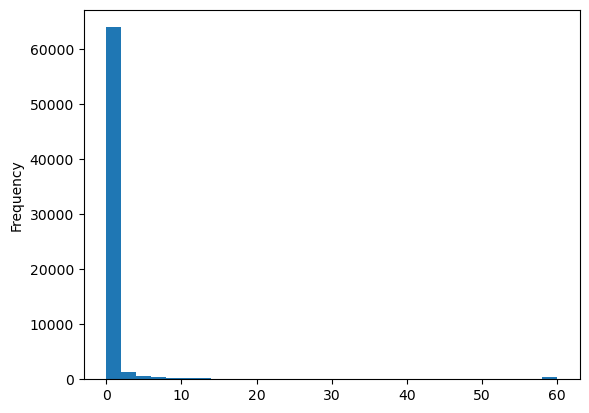

In [109]:
basic_cols['dur'].plot.hist(bins=30)

In [110]:
def log_min(x):
    x_log = np.log(x+np.sqrt(min(x[x>0]))/2)
    return x_log

<Axes: ylabel='Frequency'>

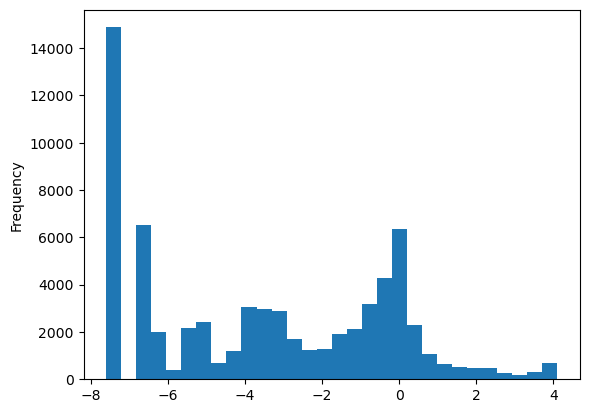

In [111]:
basic_cols['dur'].transform(lambda x: log_min(x)).plot.hist(bins=30)

<Axes: ylabel='Frequency'>

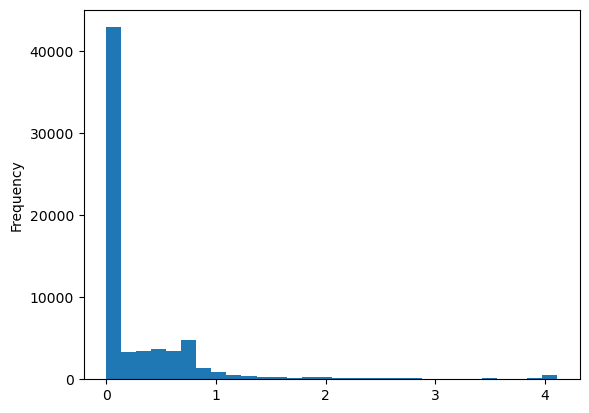

In [112]:
basic_cols['dur'].transform(lambda x: np.log(x+1)).plot.hist(bins=30)

In [113]:
from sklearn.preprocessing import PowerTransformer

<Axes: ylabel='Frequency'>

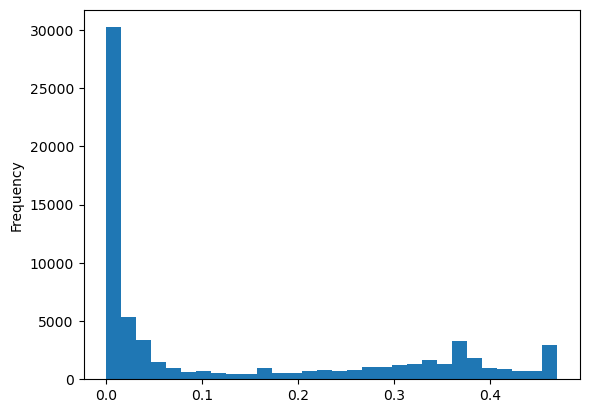

In [114]:
dur_pt = PowerTransformer(method='yeo-johnson', standardize=False)
dur_yj = dur_pt.fit_transform(train[['dur']])
pd.Series(dur_yj.flatten()).plot.hist(bins=30)

<Axes: ylabel='Frequency'>

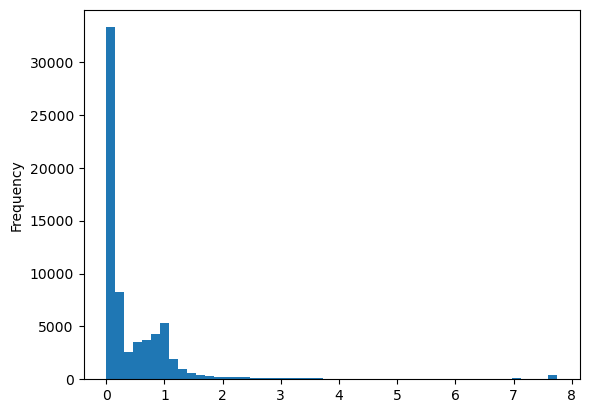

In [115]:
basic_cols['dur'].transform(lambda x: np.sqrt(x)).plot.hist(bins=50)

#### sload

<Axes: ylabel='Frequency'>

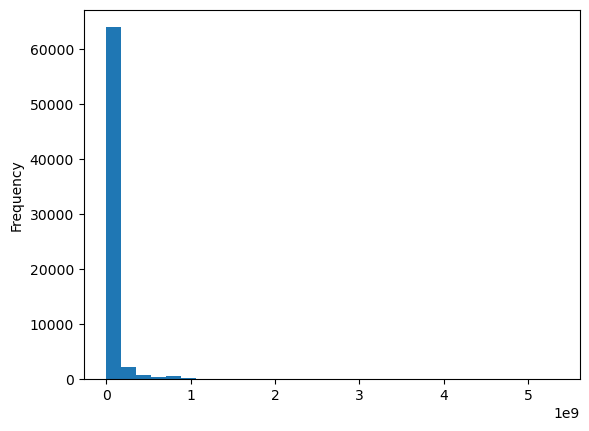

In [116]:
basic_cols['sload'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

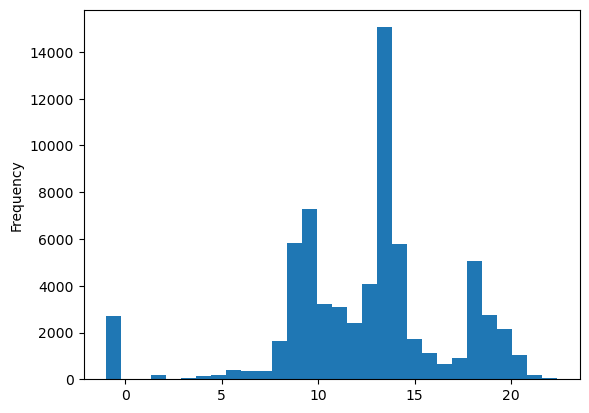

In [117]:
basic_cols['sload'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### dload

<Axes: ylabel='Frequency'>

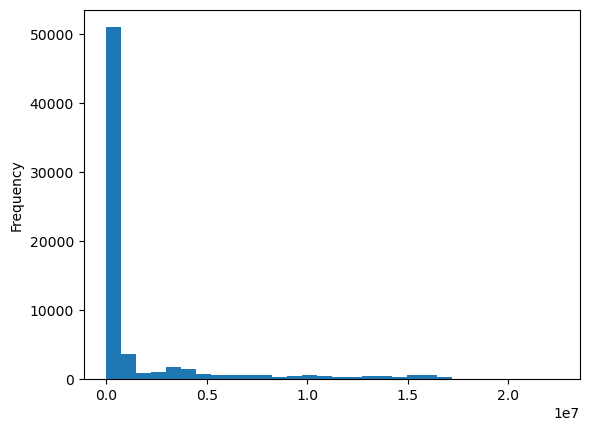

In [118]:
basic_cols['dload'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

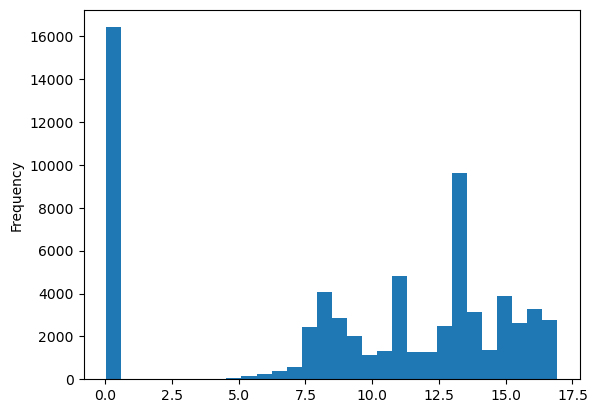

In [119]:
basic_cols['dload'].transform(lambda x: log_min(x)).plot.hist(bins=30)

In [120]:
basic_cols.select_dtypes(include=int).describe()

,sbytes,dbytes,sttl,dttl,sloss,dloss,spkts,dpkts
count,6.826400e+04,6.826400e+04,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000
mean,6.471102e+03,2.887918e+04,103.723793,61.381182,5.392403,13.012056,29.252153,34.578006
std,1.261465e+05,2.008656e+05,104.669064,88.955706,48.550609,73.258986,110.873591,151.724319
min,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000e+02,8.600000e+01,31.000000,29.000000,0.000000,0.000000,2.000000,2.000000
50%,9.300000e+02,3.540000e+02,31.000000,29.000000,2.000000,1.000000,10.000000,8.000000
75%,2.958000e+03,5.474000e+03,254.000000,29.000000,7.000000,7.000000,30.000000,24.000000
max,1.067801e+07,1.465555e+07,255.000000,254.000000,4033.000000,5484.000000,8070.000000,10974.000000


#### sbytes

<Axes: ylabel='Frequency'>

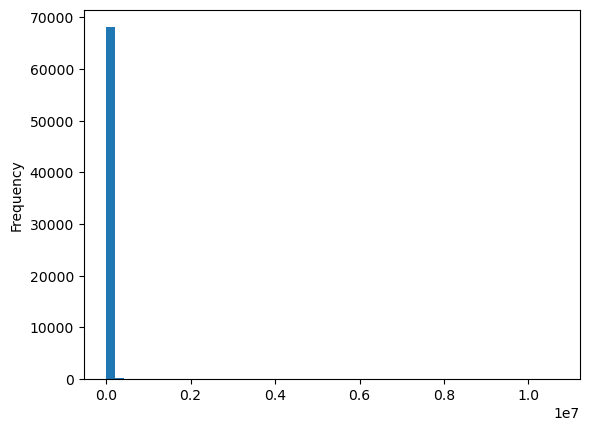

In [121]:
basic_cols['sbytes'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

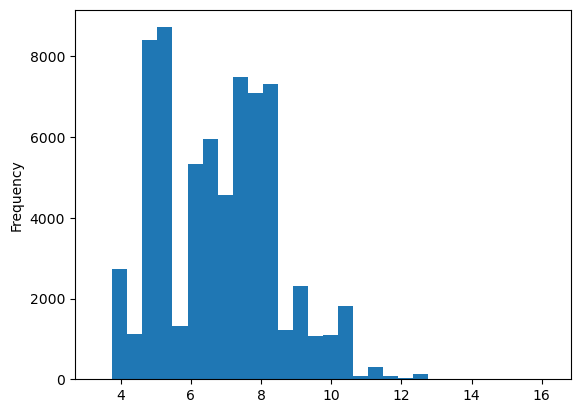

In [122]:
basic_cols['sbytes'].transform(lambda x: np.log(x)).plot.hist(bins=30)

<Axes: ylabel='Frequency'>

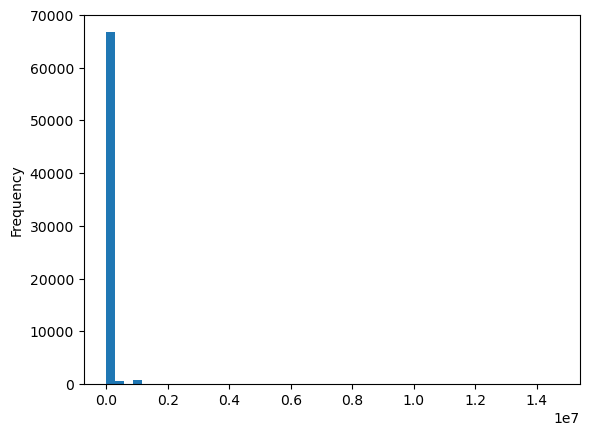

In [123]:
basic_cols['dbytes'].plot.hist(bins=50)

#### dbytes

<Axes: ylabel='Frequency'>

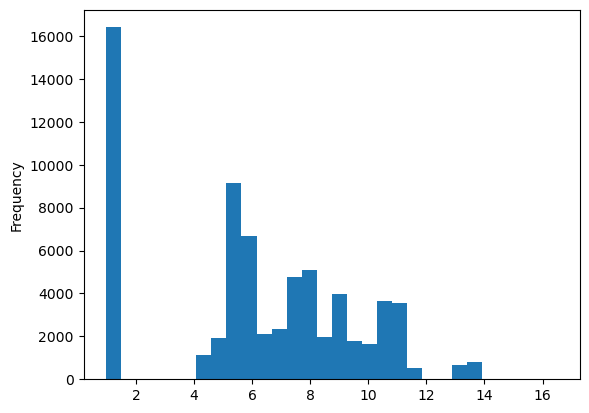

In [124]:
basic_cols['dbytes'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### sttl

<Axes: xlabel='sttl'>

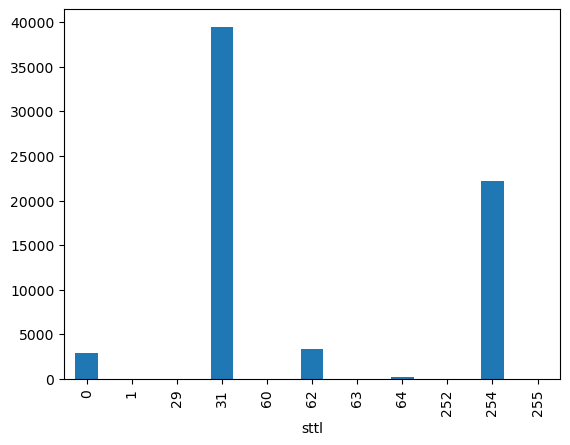

In [125]:
basic_cols['sttl'].value_counts().sort_index().plot.bar()

In [126]:
def discretise_ttl(x):
    if 0 <= x <= 10:
        return '0'
    elif 20 < x < 40:
        return '30'
    elif 50 < x < 70:
        return '60'
    elif 242 < x < 262:
        return '252'
    else:
        return np.nan

<Axes: xlabel='sttl'>

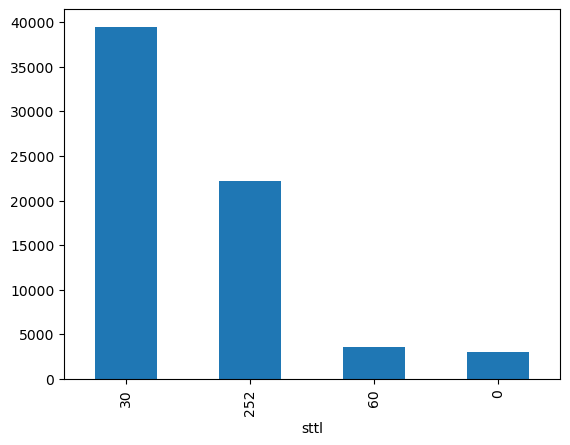

In [127]:
basic_cols['sttl'].transform(lambda x: discretise_ttl(x)).value_counts().plot.bar()

In [128]:
train['sttl'] = (
    pd.Categorical(
        train['sttl'].transform(lambda x: discretise_ttl(x)),
        categories=['0', '30', '60', '252'], 
        ordered=True
    )
)
test['sttl'] = (
    pd.Categorical(
        test['sttl'].transform(lambda x: discretise_ttl(x)),
        categories=['0', '30', '60', '252'], 
        ordered=True
    )
)

#### dttl

<Axes: xlabel='dttl'>

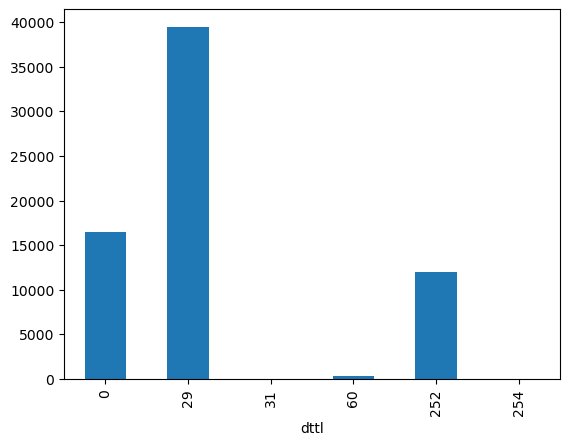

In [129]:
basic_cols['dttl'].value_counts().sort_index().plot.bar()

<Axes: xlabel='dttl'>

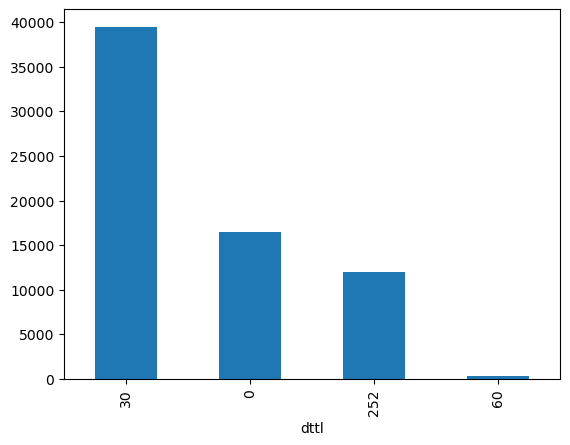

In [130]:
basic_cols['dttl'].transform(lambda x: discretise_ttl(x)).value_counts().plot.bar()

In [131]:
train['dttl'] = (
    pd.Categorical(
        train['dttl'].transform(lambda x: discretise_ttl(x)),
        categories=['0', '30', '60', '252'], 
        ordered=True
    )
)
test['dttl'] = (
    pd.Categorical(
        test['dttl'].transform(lambda x: discretise_ttl(x)),
        categories=['0', '30', '60', '252'], 
        ordered=True
    )
)

#### sloss

<Axes: ylabel='Frequency'>

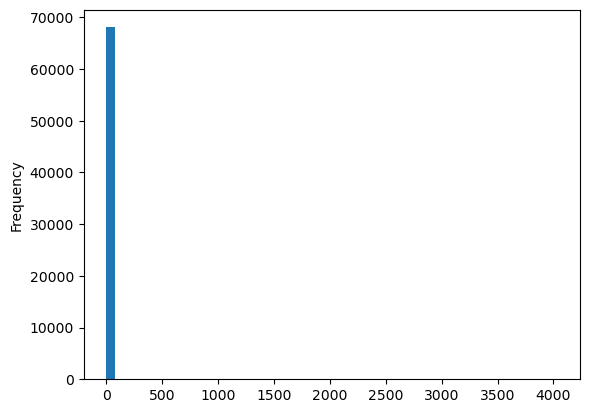

In [132]:
basic_cols['sloss'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

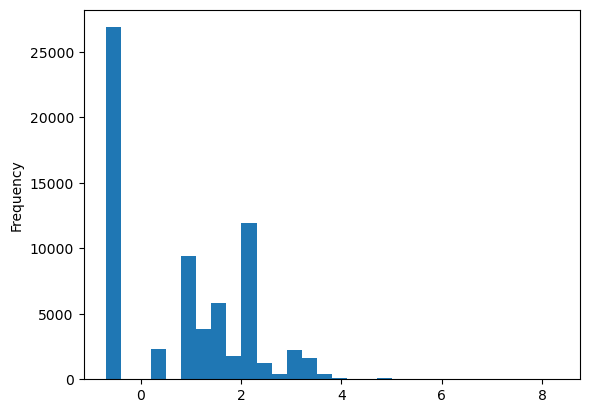

In [133]:
basic_cols['sloss'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### dloss

<Axes: ylabel='Frequency'>

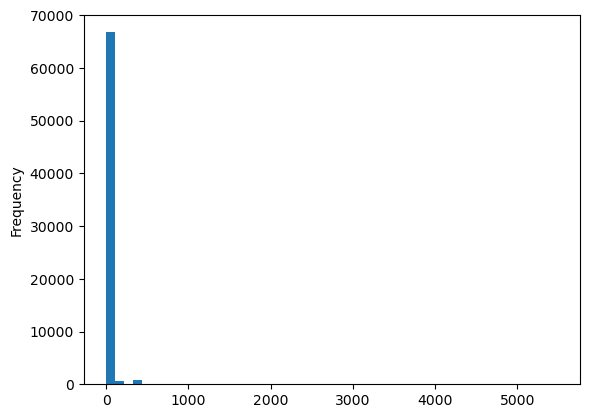

In [134]:
basic_cols['dloss'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

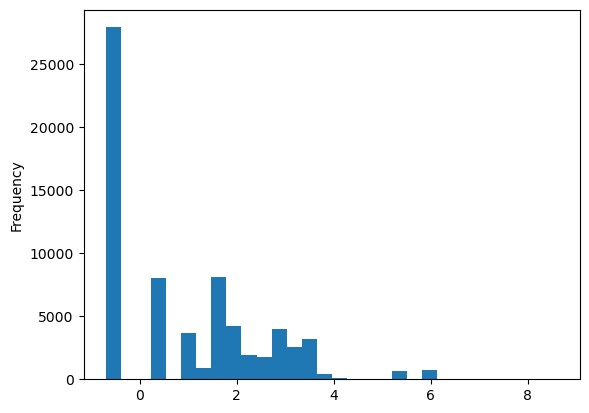

In [135]:
basic_cols['dloss'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### spkts

<Axes: ylabel='Frequency'>

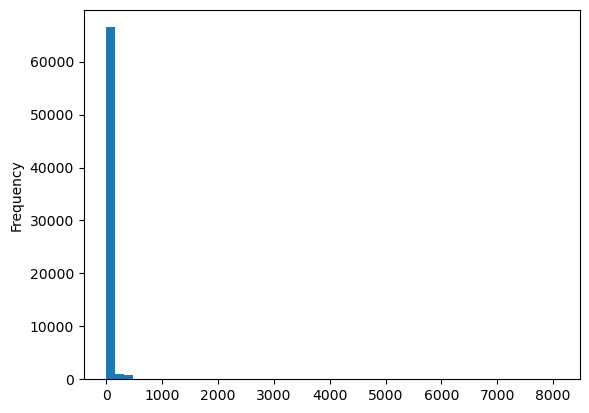

In [136]:
basic_cols['spkts'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

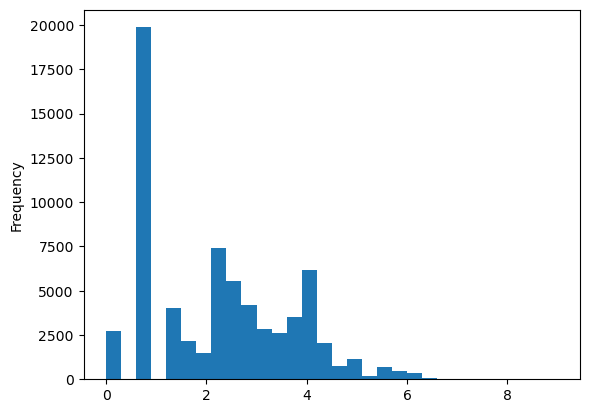

In [137]:
basic_cols['spkts'].transform(lambda x: np.log(x)).plot.hist(bins=30)

#### dpkts

<Axes: ylabel='Frequency'>

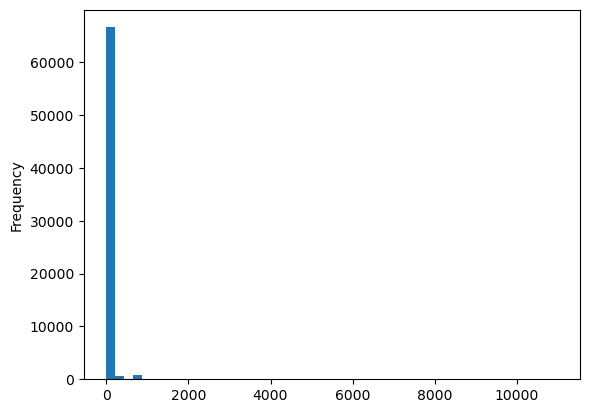

In [138]:
basic_cols['dpkts'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

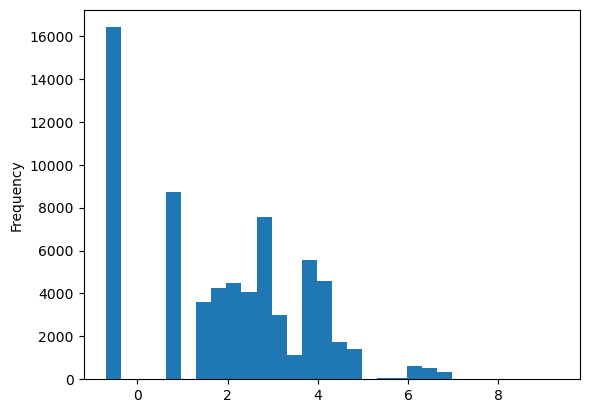

In [139]:
basic_cols['dpkts'].transform(lambda x: log_min(x)).plot.hist(bins=30)

Log-min predictors with zero minimum. Binarise predictors with zero minimum (0 when 0 and 1 when other).

### Content features

In [140]:
content_features = [
    'swin',
    'dwin',
    'stcpb',
    'dtcpb',
    'smean',
    'dmean',
    'trans_depth',
    'response_body_len' 
]

In [141]:
content_cols = train[content_features]

In [142]:
content_cols.select_dtypes(include='int').describe()

,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len
count,68264.000000,68264.000000,6.826400e+04,6.826400e+04,68264.000000,68264.000000,68264.000000,6.826400e+04
mean,154.634331,151.439763,1.280710e+09,1.272734e+09,139.401105,215.548005,0.093783,3.809008e+03
std,124.573061,125.230782,1.424017e+09,1.419826e+09,184.412076,311.990994,0.295918,6.442772e+04
min,0.000000,0.000000,0.000000e+00,0.000000e+00,28.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000e+00,0.000000e+00,60.000000,43.000000,0.000000,0.000000e+00
50%,255.000000,255.000000,6.872489e+08,6.836330e+08,80.000000,81.000000,0.000000,0.000000e+00
75%,255.000000,255.000000,2.500759e+09,2.486793e+09,120.000000,188.000000,0.000000,0.000000e+00
max,255.000000,255.000000,4.294814e+09,4.294882e+09,1499.000000,1458.000000,5.000000,5.242880e+06


#### swin

<Axes: xlabel='swin'>

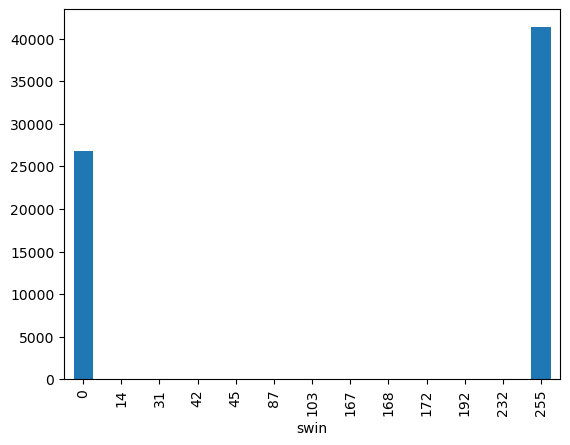

In [143]:
content_cols['swin'].value_counts().sort_index().plot.bar()

In [144]:
content_cols['swin'].value_counts()

swin
255    41391
0      26862
31         1
232        1
14         1
192        1
103        1
45         1
87         1
172        1
168        1
167        1
42         1
Name: count, dtype: int64

In [145]:
def discretise_tcp(x):
    if x == 0:
        return '0'
    elif x == 255:
        return '255'
    else:
        return 'rare'

<Axes: xlabel='swin'>

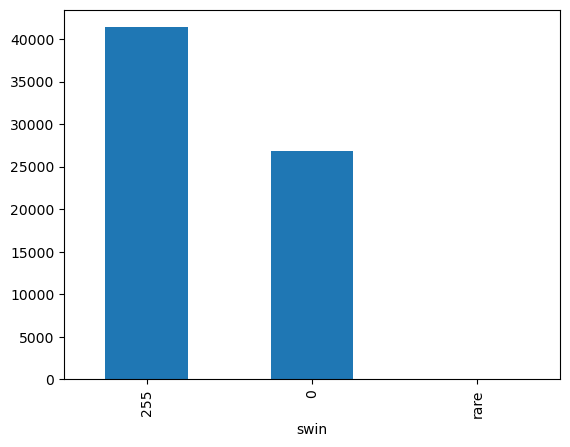

In [146]:
train['swin'].transform(lambda x: discretise_tcp(x)).value_counts().plot.bar()

In [147]:
train['swin'] = train['swin'].transform(lambda x: discretise_tcp(x))
test['swin'] = test['swin'].transform(lambda x: discretise_tcp(x))

#### dwin

<Axes: xlabel='dwin'>

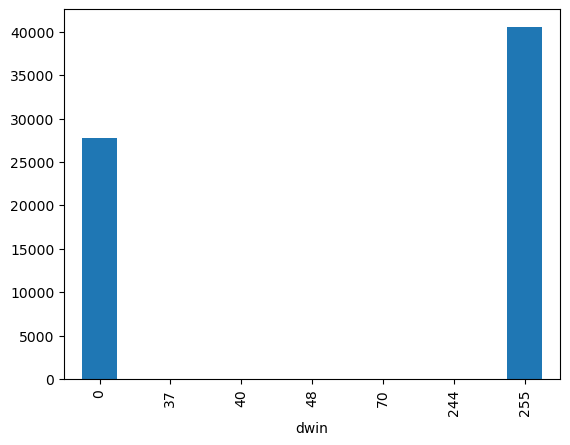

In [148]:
content_cols['dwin'].value_counts().sort_index().plot.bar()

In [149]:
content_cols['dwin'].value_counts()

dwin
255    40539
0      27720
244        1
70         1
48         1
37         1
40         1
Name: count, dtype: int64

<Axes: xlabel='dwin'>

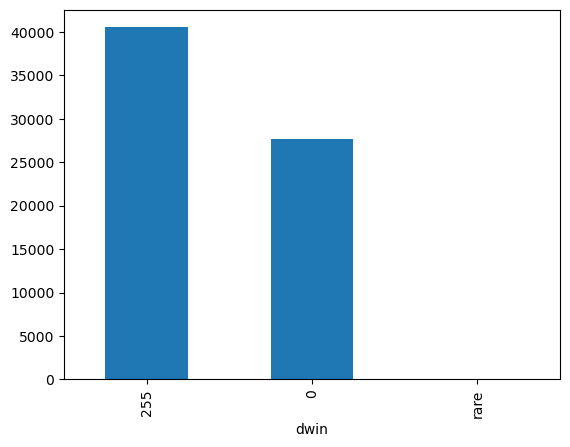

In [147]:
train['dwin'].transform(lambda x: discretise_tcp(x)).value_counts().plot.bar()

In [148]:
train['dwin'] = train['dwin'].transform(lambda x: discretise_tcp(x))
test['dwin'] = test['dwin'].transform(lambda x: discretise_tcp(x))

#### stcpb

<Axes: ylabel='Frequency'>

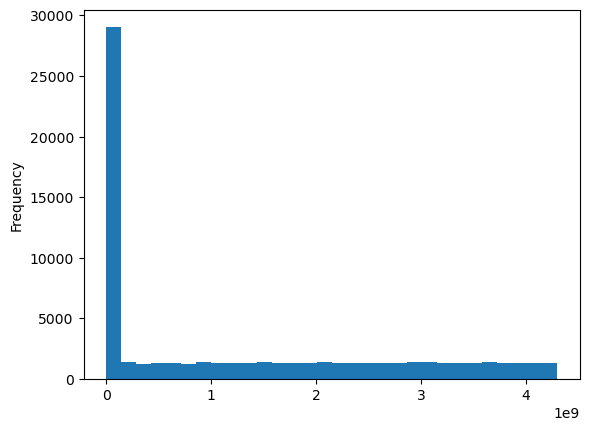

In [149]:
content_cols['stcpb'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

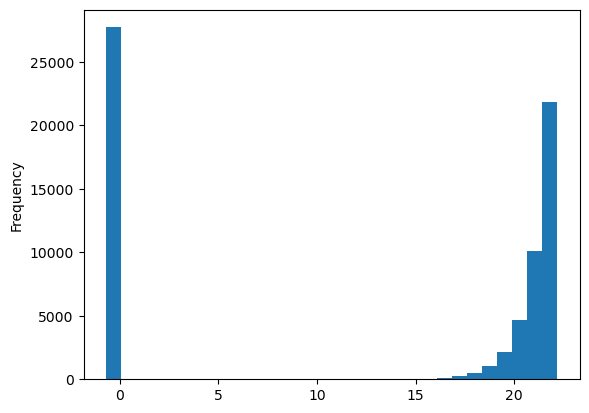

In [150]:
content_cols['stcpb'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### dtcpb

<Axes: ylabel='Frequency'>

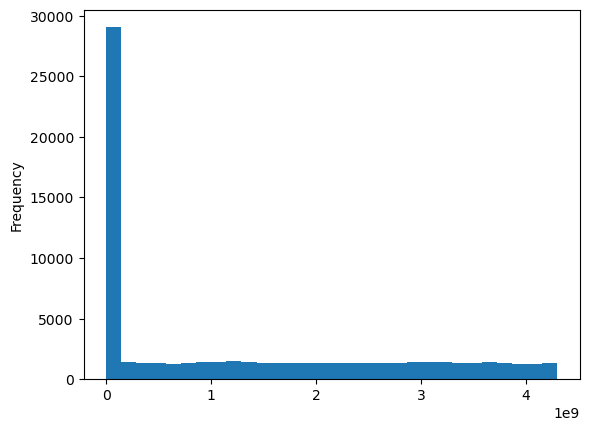

In [151]:
content_cols['dtcpb'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

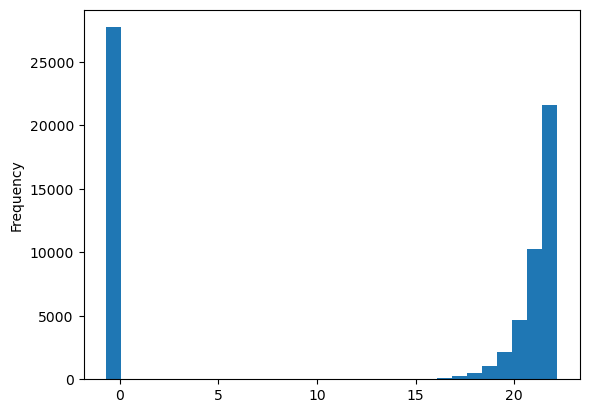

In [152]:
content_cols['dtcpb'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### smean

<Axes: ylabel='Frequency'>

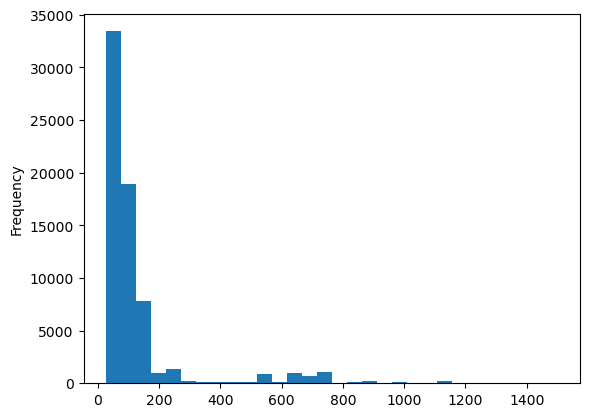

In [153]:
content_cols['smean'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

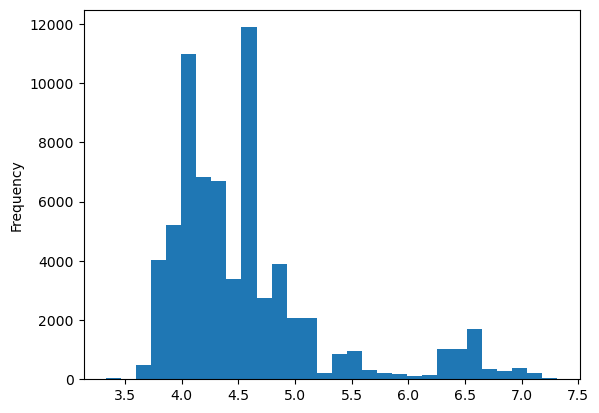

In [154]:
content_cols['smean'].transform(lambda x: np.log(x)).plot.hist(bins=30)

#### dmean

<Axes: ylabel='Frequency'>

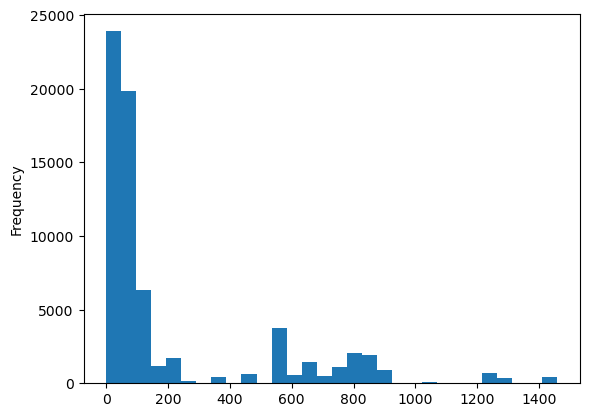

In [155]:
content_cols['dmean'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

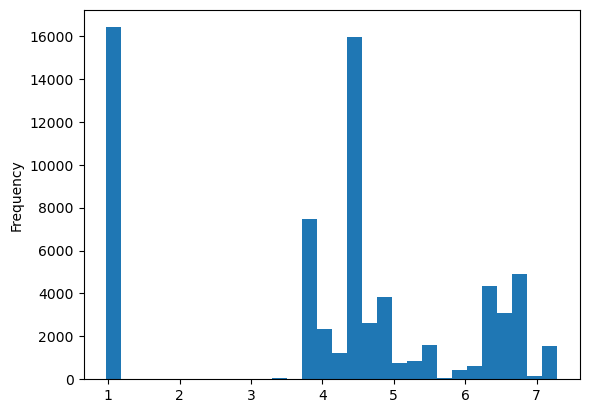

In [156]:
content_cols['dmean'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### trans_depth

<Axes: xlabel='trans_depth'>

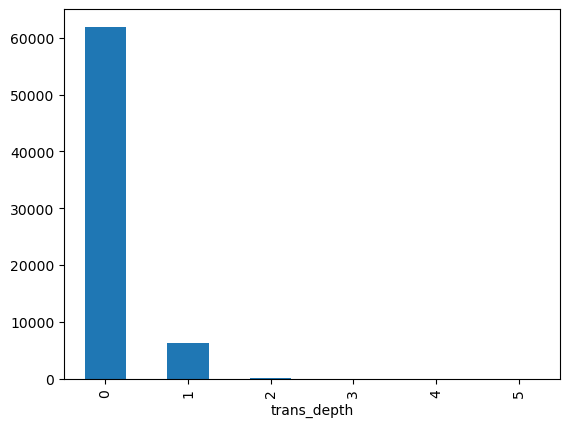

In [157]:
content_cols['trans_depth'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

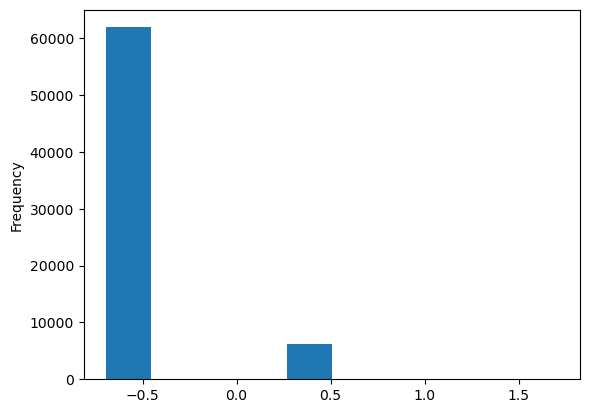

In [158]:
content_cols['trans_depth'].transform(lambda x: log_min(x)).plot.hist(bins=10)

#### response_body_len

<Axes: ylabel='Frequency'>

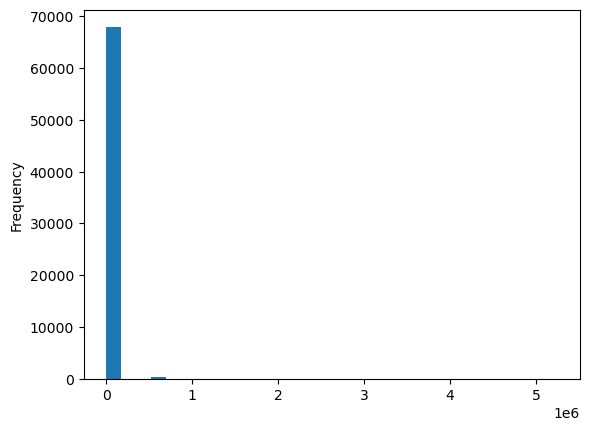

In [159]:
content_cols['response_body_len'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

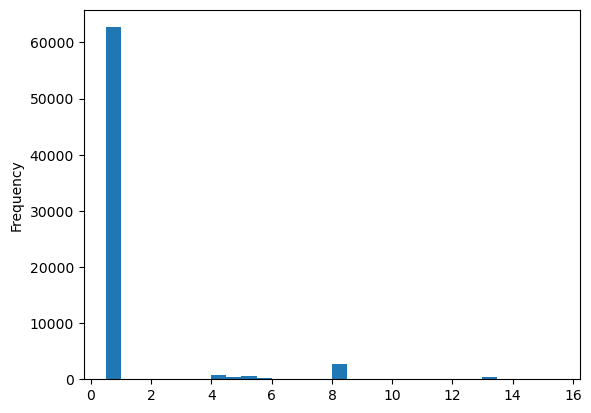

In [160]:
content_cols['response_body_len'].transform(lambda x: log_min(x)).plot.hist(bins=30)

### Time features

In [161]:
time_features = [
    'sjit',
    'djit',
    'sinpkt',
    'dinpkt',
    'tcprtt',
    'ackdat', 
    'synack'
]

In [162]:
time_cols = train[time_features]

In [163]:
time_cols.select_dtypes(include='float').describe()

,sjit,djit,sinpkt,dinpkt,tcprtt,ackdat,synack
count,6.826400e+04,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000
mean,4.625323e+03,811.834646,2351.973320,102.697665,0.030150,0.014057,0.016093
std,4.564670e+04,5643.403625,11381.713080,1383.933630,0.083773,0.042621,0.047673
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.009000,0.002000,0.000000,0.000000,0.000000
50%,3.240476e+01,4.132784,1.176135,0.516320,0.000615,0.000121,0.000488
75%,1.895860e+03,103.324419,50.266263,22.448285,0.000748,0.000146,0.000598
max,1.460480e+06,289388.269700,60009.920000,56716.824000,2.518893,1.520884,2.100352


#### sjit

<Axes: ylabel='Frequency'>

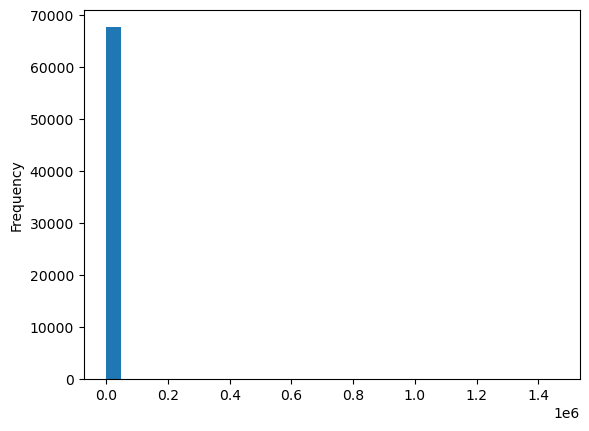

In [164]:
time_cols['sjit'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

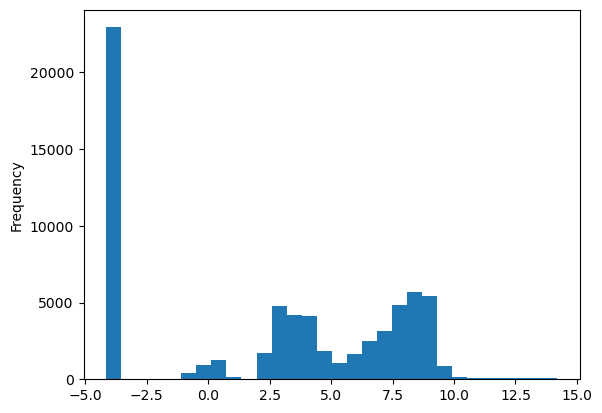

In [165]:
time_cols['sjit'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### djit

<Axes: ylabel='Frequency'>

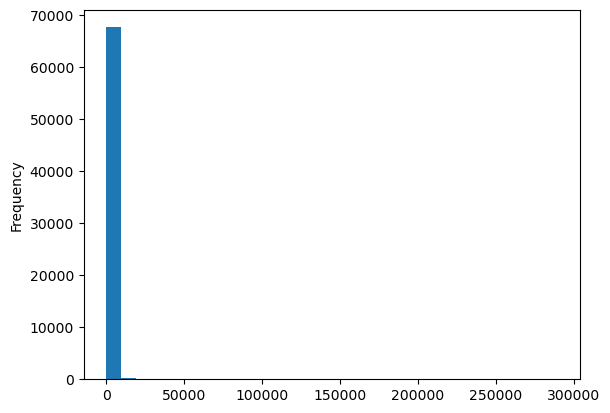

In [166]:
time_cols['djit'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

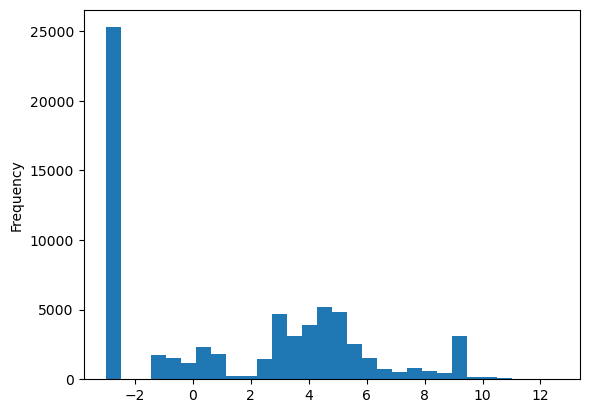

In [167]:
time_cols['djit'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### sinpkt

<Axes: ylabel='Frequency'>

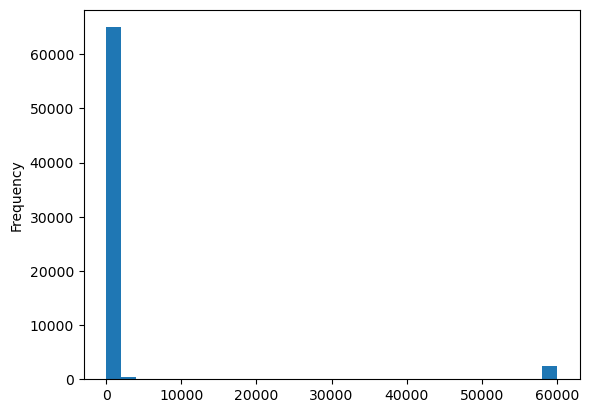

In [168]:
time_cols['sinpkt'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

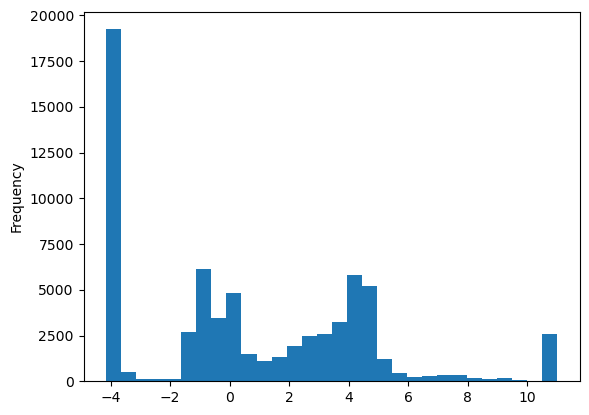

In [169]:
time_cols['sinpkt'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### dinpkt

<Axes: ylabel='Frequency'>

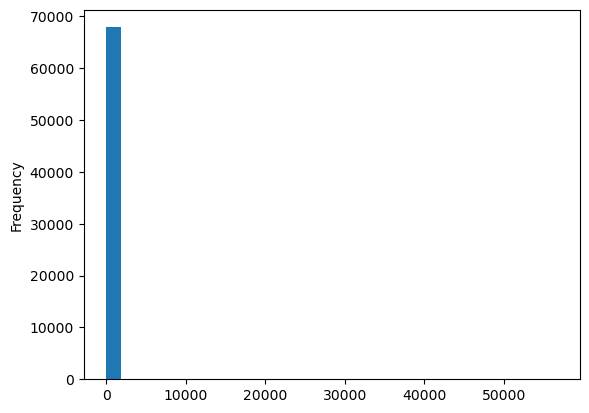

In [170]:
time_cols['dinpkt'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

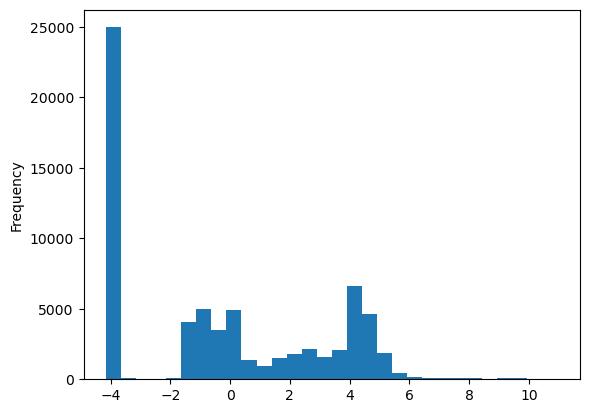

In [171]:
time_cols['dinpkt'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### tcprtt

<Axes: ylabel='Frequency'>

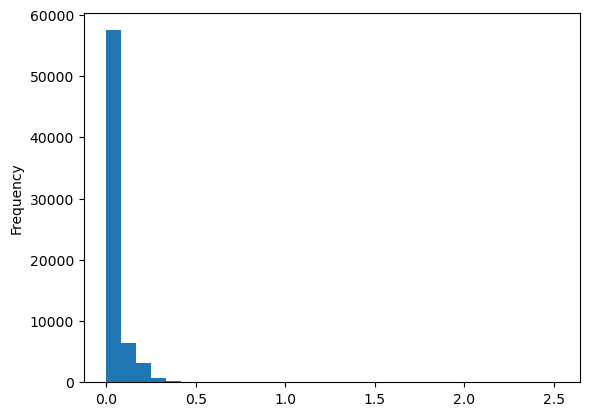

In [172]:
time_cols['tcprtt'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

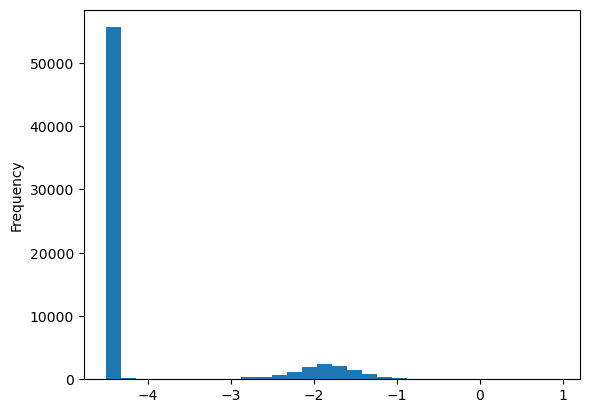

In [173]:
time_cols['tcprtt'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### ackdat

<Axes: ylabel='Frequency'>

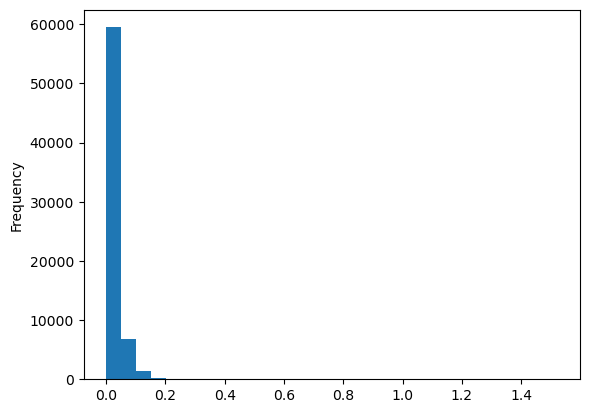

In [174]:
time_cols['ackdat'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

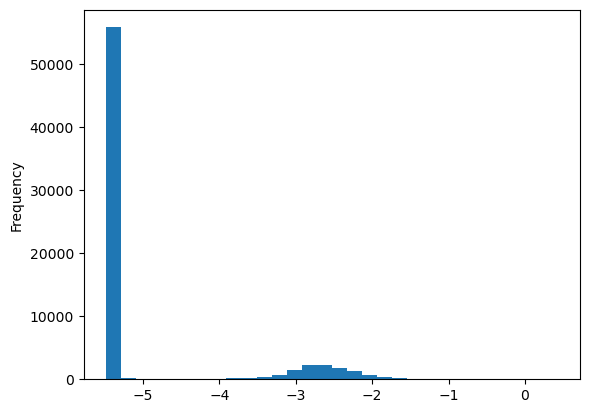

In [175]:
time_cols['ackdat'].transform(lambda x: log_min(x)).plot.hist(bins=30)

#### synack

<Axes: ylabel='Frequency'>

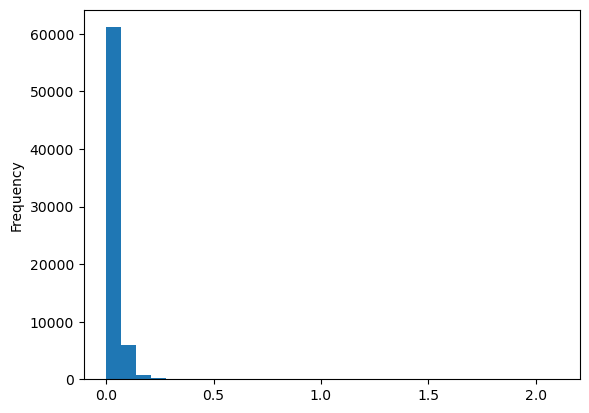

In [176]:
time_cols['synack'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

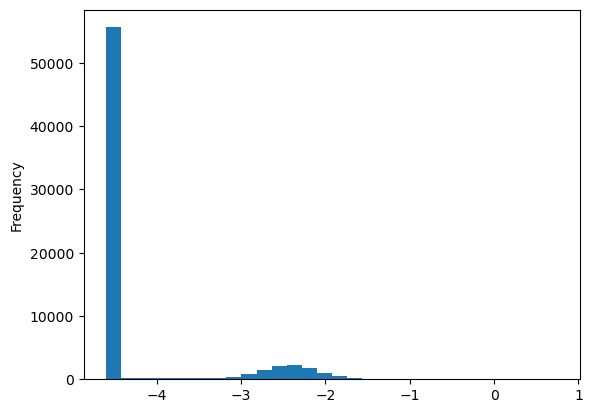

In [177]:
time_cols['synack'].transform(lambda x: log_min(x)).plot.hist(bins=30)

### General purpose features

In [178]:
general_features = [
    'ct_state_ttl',
    'ct_flw_http_mthd',
    'ct_ftp_cmd'
]

In [179]:
general_cols = train[general_features]

In [180]:
general_cols.describe()

,ct_state_ttl,ct_flw_http_mthd,ct_ftp_cmd
count,68264.000000,68264.000000,68264.000000
mean,0.742368,0.114848,0.014180
std,1.097666,0.477488,0.118482
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
max,6.000000,12.000000,2.000000


#### ct_state_ttl

<Axes: xlabel='ct_state_ttl'>

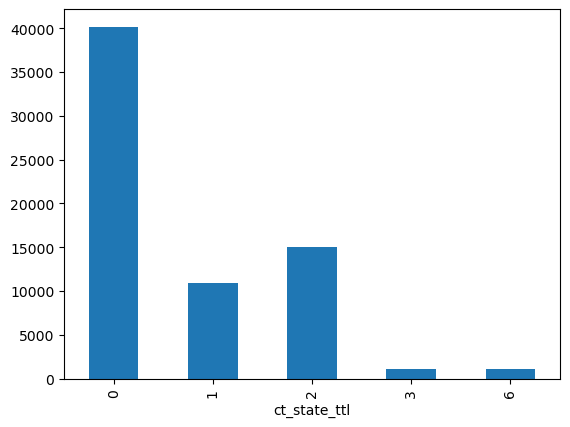

In [181]:
general_cols['ct_state_ttl'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

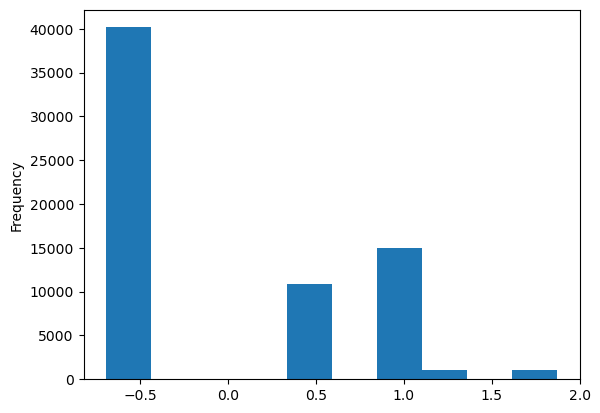

In [182]:
general_cols['ct_state_ttl'].transform(lambda x: log_min(x)).plot.hist(bins=10)

#### ct_flw_http_mthd	

<Axes: xlabel='ct_flw_http_mthd'>

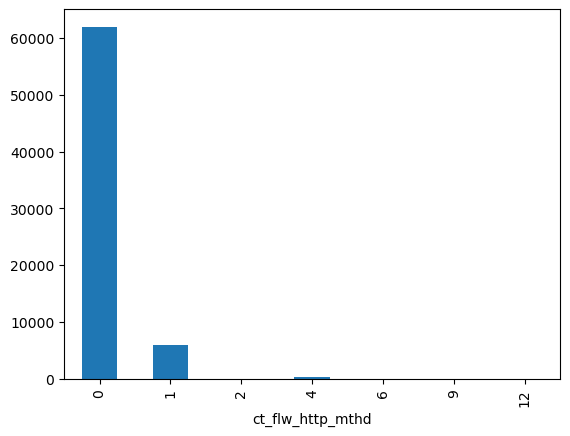

In [183]:
general_cols['ct_flw_http_mthd'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

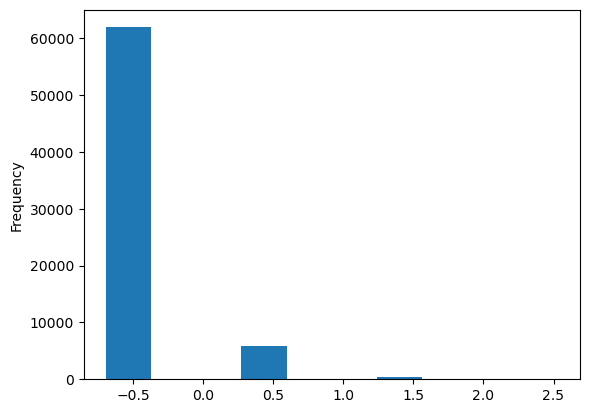

In [184]:
general_cols['ct_flw_http_mthd'].transform(lambda x: log_min(x)).plot.hist(bins=10)

#### ct_ftp_cmd

<Axes: xlabel='ct_ftp_cmd'>

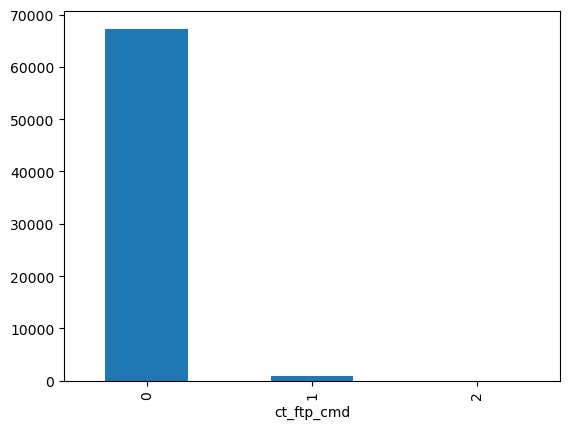

In [185]:
general_cols['ct_ftp_cmd'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

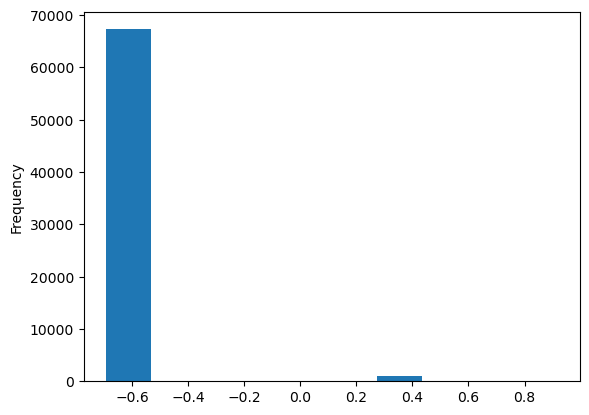

In [186]:
general_cols['ct_ftp_cmd'].transform(lambda x: log_min(x)).plot.hist(bins=10)

### Connection features

In [187]:
connection_features = [
    'ct_srv_src',
    'ct_srv_dst',
    'ct_dst_ltm',
    'ct_src_ltm',
    'ct_src_dport_ltm',
    'ct_dst_sport_ltm',
    'ct_dst_src_ltm'
]

In [188]:
connection_cols = train[connection_features]

In [189]:
connection_cols.describe()

,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
count,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000,68264.000000
mean,5.481996,5.294972,3.301213,4.052722,1.845175,1.345438,4.057673
std,5.536825,5.421910,3.200502,4.146878,2.556313,1.948712,5.205992
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,4.000000,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,7.000000,7.000000,4.000000,5.000000,2.000000,1.000000,5.000000
max,63.000000,62.000000,46.000000,47.000000,46.000000,46.000000,63.000000


#### ct_srv_src

<Axes: xlabel='ct_srv_src'>

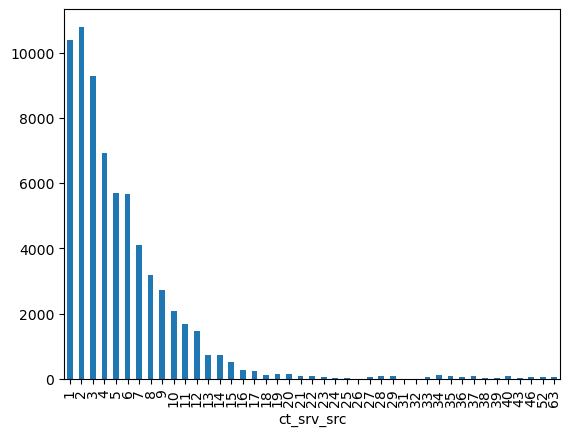

In [190]:
connection_cols['ct_srv_src'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

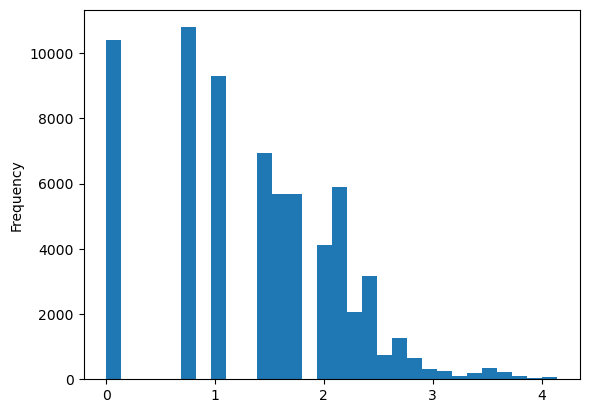

In [191]:
connection_cols['ct_srv_src'].transform(lambda x: np.log(x)).plot.hist(bins=30)

#### ct_srv_dst

<Axes: xlabel='ct_srv_dst'>

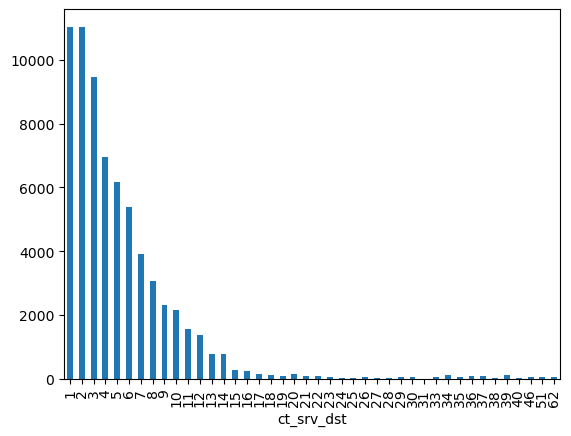

In [192]:
connection_cols['ct_srv_dst'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

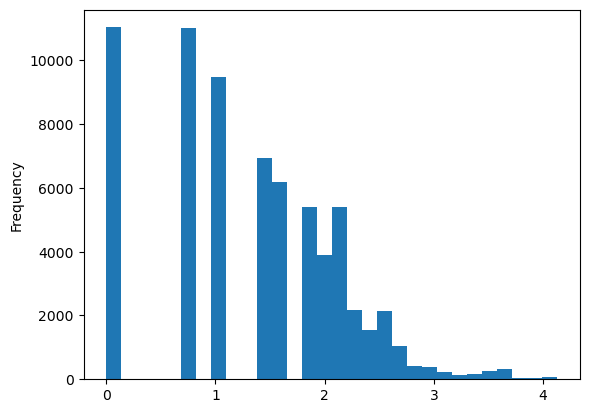

In [193]:
connection_cols['ct_srv_dst'].transform(lambda x: np.log(x)).plot.hist(bins=30)

#### ct_dst_ltm

<Axes: xlabel='ct_dst_ltm'>

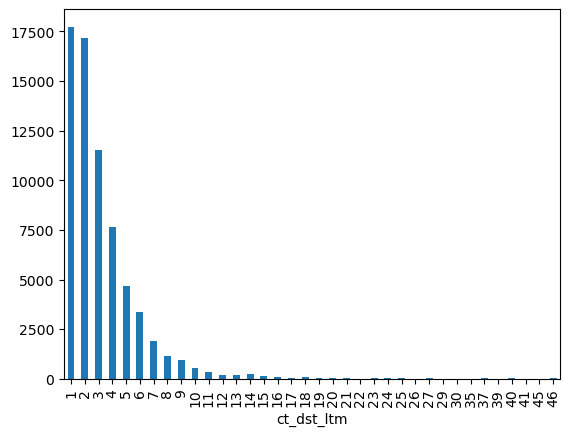

In [194]:
connection_cols['ct_dst_ltm'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

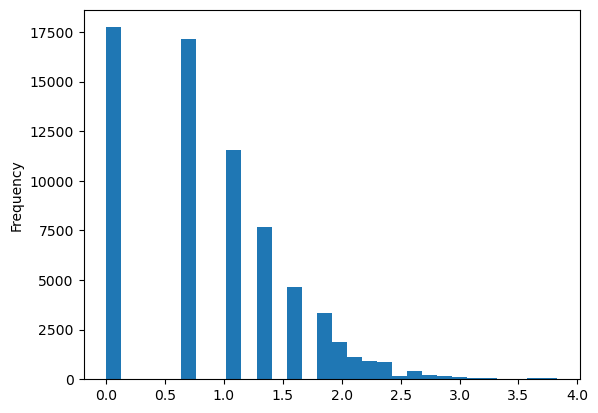

In [195]:
connection_cols['ct_dst_ltm'].transform(lambda x: np.log(x)).plot.hist(bins=30)

#### ct_src_ltm

<Axes: xlabel='ct_src_ltm'>

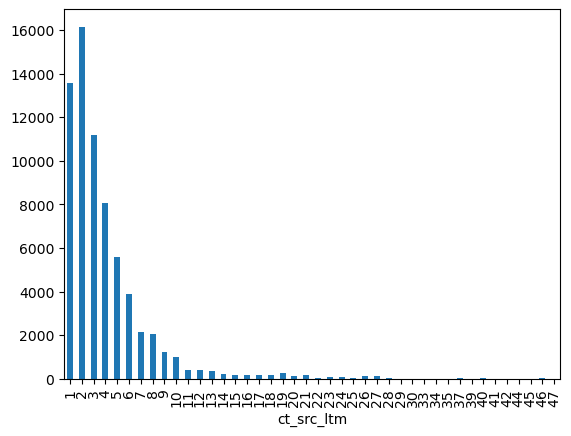

In [196]:
connection_cols['ct_src_ltm'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

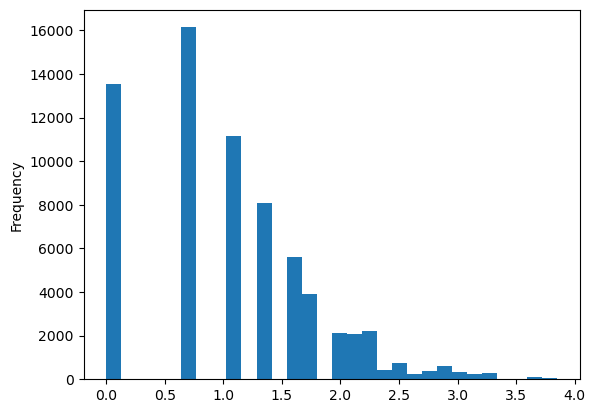

In [197]:
connection_cols['ct_src_ltm'].transform(lambda x: np.log(x)).plot.hist(bins=30)

#### ct_src_dport_ltm

<Axes: xlabel='ct_src_dport_ltm'>

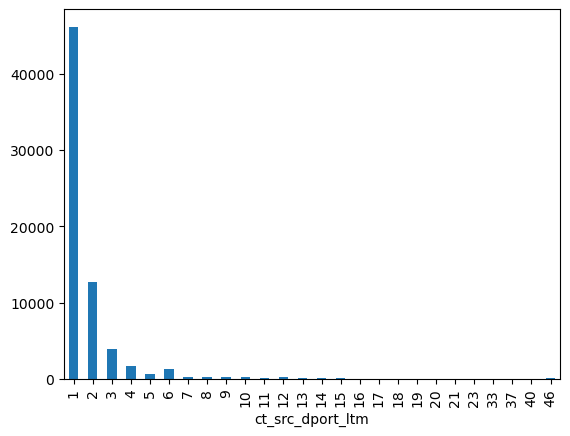

In [198]:
connection_cols['ct_src_dport_ltm'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

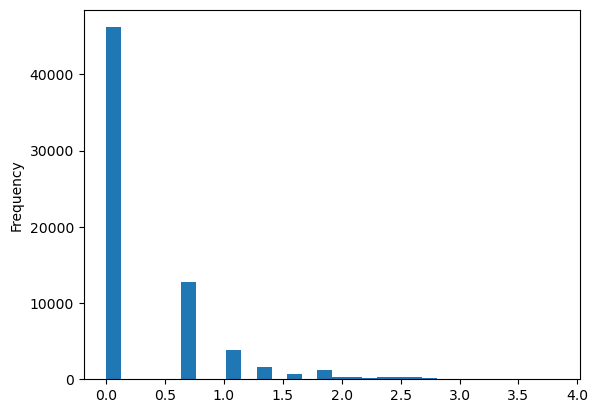

In [199]:
connection_cols['ct_src_dport_ltm'].transform(lambda x: np.log(x)).plot.hist(bins=30)

#### ct_dst_sport_ltm

<Axes: xlabel='ct_dst_sport_ltm'>

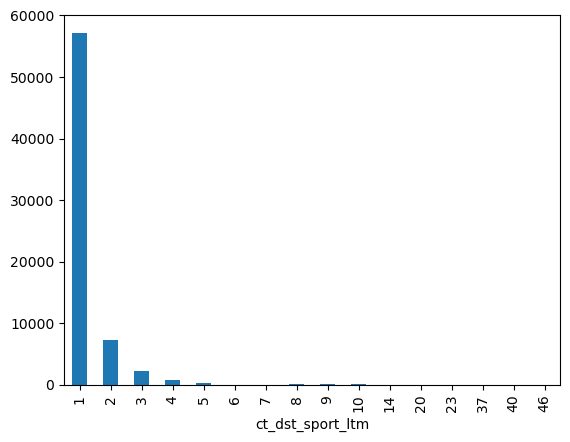

In [200]:
connection_cols['ct_dst_sport_ltm'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

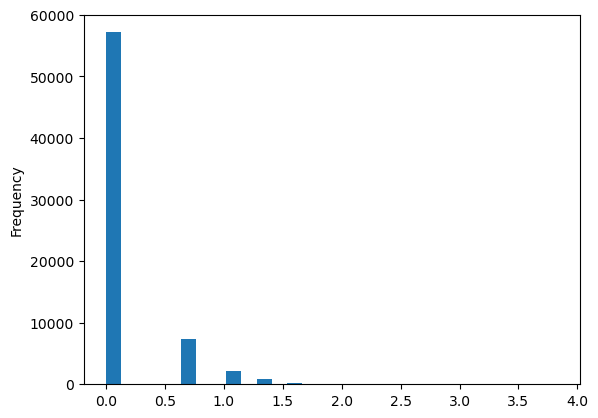

In [201]:
connection_cols['ct_dst_sport_ltm'].transform(lambda x: np.log(x)).plot.hist(bins=30)

#### ct_dst_src_ltm

<Axes: xlabel='ct_dst_src_ltm'>

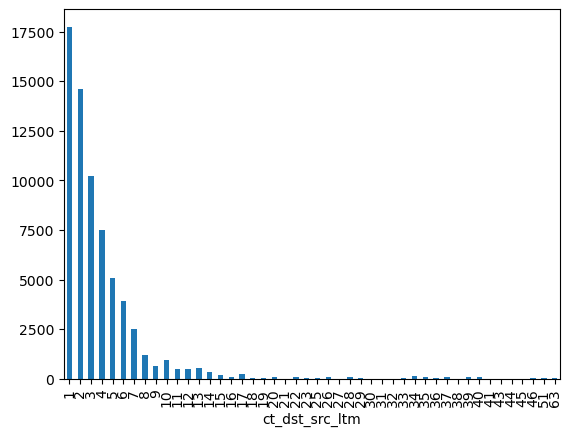

In [202]:
connection_cols['ct_dst_src_ltm'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

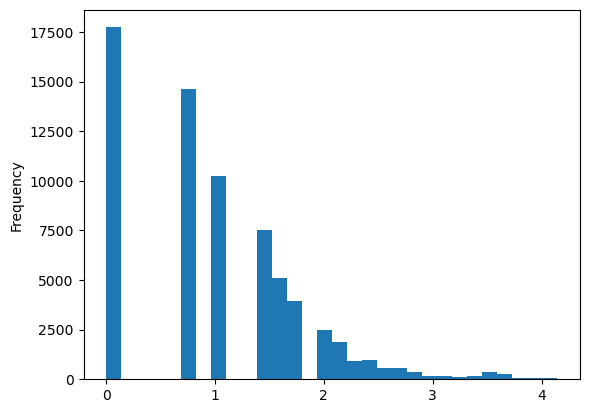

In [203]:
connection_cols['ct_dst_src_ltm'].transform(lambda x: np.log(x)).plot.hist(bins=30)

#### rare

In [204]:
train['rate'].describe()

count    6.826400e+04
mean     3.855143e+04
std      1.134359e+05
min      0.000000e+00
25%      3.361857e+01
50%      1.767968e+03
75%      4.855515e+03
max      1.000000e+06
Name: rate, dtype: float64

<Axes: ylabel='Frequency'>

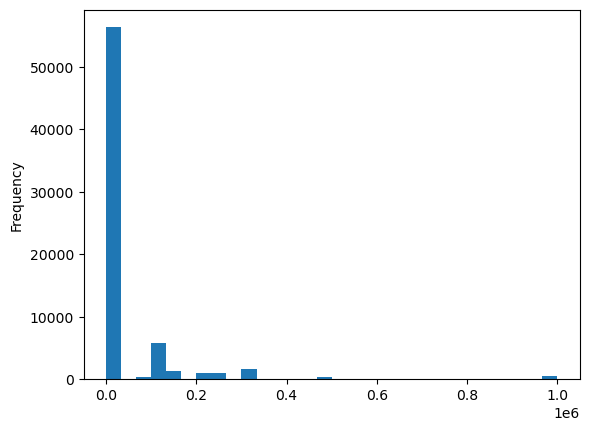

In [205]:
train['rate'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

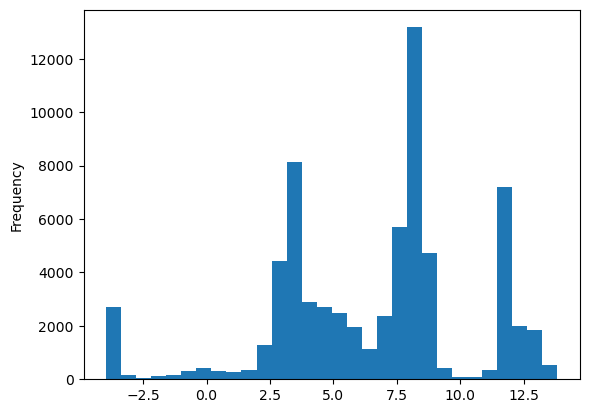

In [206]:
train['rate'].transform(lambda x: log_min(x)).plot.hist(bins=30)

## Feature selection

In [207]:
train.select_dtypes(include=['float', 'int']).columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload',
       'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'label'],
      dtype='object')

In [208]:
test.select_dtypes(include=['float', 'int']).columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload',
       'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'label'],
      dtype='object')

In [209]:
train.select_dtypes(include=['object', 'category']).columns

Index(['proto', 'service', 'state', 'sttl', 'dttl', 'swin', 'dwin'], dtype='object')

In [210]:
test.select_dtypes(include=['object', 'category']).columns

Index(['proto', 'service', 'state', 'sttl', 'dttl', 'swin', 'dwin'], dtype='object')

In [211]:
from sklearn.base import BaseEstimator, TransformerMixin

In [212]:
class LogMinTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.offsets_ = None
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.offsets_ = []
        self.feature_names_in_ = X.columns.tolist()

        for col in X.columns:
            col_data = X[col]
            min_val = col_data.min()
            
            if min_val <= 0:
                min_pos = col_data[col_data > 0].min()
                if pd.isnull(min_pos):  
                    offset = 1e-8
                else:
                    offset = np.sqrt(min_pos) / 2
            else:
                offset = 0.0

            self.offsets_.append(offset)
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=self.feature_names_in_)
        X_log = X.copy()

        for i, col in enumerate(X.columns):
            offset = self.offsets_[i]
            X_log[col] = np.log(X[col] + offset)
        
        return X_log

In [213]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

In [214]:
y_train = train['label'].copy()
X_train = train.drop(['label'], axis=1).copy()

y_test = train['label'].copy()
X_test = train.drop(['label'], axis=1).copy()

In [215]:
bin_feature = ['is_sm_ips_ports']

In [216]:
num_features = (
    X_train.select_dtypes(include=['int', 'float']).
    drop(bin_feature, axis=1).
    columns.tolist()
)
cat_features = (
    X_train.select_dtypes(include=['object']).
    columns.tolist()
)
ord_features = (
    X_train.select_dtypes(include=['category']).
    columns.tolist()
)

In [217]:
numeric_pipeline = Pipeline([
    ('transform', LogMinTransformer()),
    ('scaler', RobustScaler()) 
])

In [218]:
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [219]:
ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder())
])

In [220]:
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features),
    ('ord', ordinal_pipeline, ord_features)
], remainder='drop')

In [221]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [222]:
ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_features)
all_feature_names = num_features + list(ohe_feature_names) + ord_features

In [223]:
X_train_proc_df = pd.DataFrame(X_train_proc, columns=all_feature_names, index=X_train.index)
X_test_proc_df = pd.DataFrame(X_test_proc, columns=all_feature_names, index=X_test.index)

X_train_proc_df[bin_feature[0]] = X_train[bin_feature].astype('float').to_numpy()
X_test_proc_df[bin_feature[0]] = X_test[bin_feature].astype('float').to_numpy()

In [224]:
X_train_proc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68264 entries, 0 to 175248
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                68264 non-null  float64
 1   spkts              68264 non-null  float64
 2   dpkts              68264 non-null  float64
 3   sbytes             68264 non-null  float64
 4   dbytes             68264 non-null  float64
 5   rate               68264 non-null  float64
 6   sload              68264 non-null  float64
 7   dload              68264 non-null  float64
 8   sloss              68264 non-null  float64
 9   dloss              68264 non-null  float64
 10  sinpkt             68264 non-null  float64
 11  dinpkt             68264 non-null  float64
 12  sjit               68264 non-null  float64
 13  djit               68264 non-null  float64
 14  stcpb              68264 non-null  float64
 15  dtcpb              68264 non-null  float64
 16  tcprtt             68264 n

In [225]:
X_test_proc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68264 entries, 0 to 175248
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                68264 non-null  float64
 1   spkts              68264 non-null  float64
 2   dpkts              68264 non-null  float64
 3   sbytes             68264 non-null  float64
 4   dbytes             68264 non-null  float64
 5   rate               68264 non-null  float64
 6   sload              68264 non-null  float64
 7   dload              68264 non-null  float64
 8   sloss              68264 non-null  float64
 9   dloss              68264 non-null  float64
 10  sinpkt             68264 non-null  float64
 11  dinpkt             68264 non-null  float64
 12  sjit               68264 non-null  float64
 13  djit               68264 non-null  float64
 14  stcpb              68264 non-null  float64
 15  dtcpb              68264 non-null  float64
 16  tcprtt             68264 n

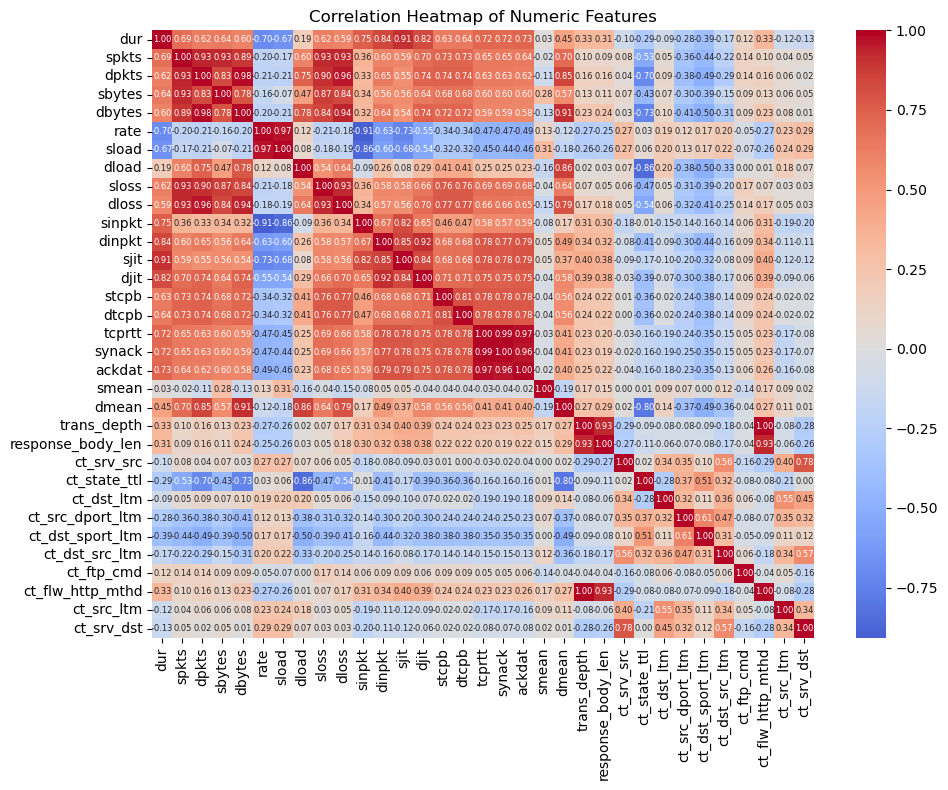

In [226]:
corr_mat = X_train_proc_df[num_features].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0, fmt=".2f", annot_kws={"size": 6})
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [227]:
from sklearn.feature_selection import mutual_info_classif

In [228]:
mi_scores = mutual_info_classif(
    X_train_proc_df, y_train,
    discrete_features='auto',  
    random_state=123
)

mi_df = pd.DataFrame({
    'feature': X_train_proc_df.columns,
    'mi_score': mi_scores
}).sort_values(by='mi_score', ascending=False)

In [229]:
print(mi_df.head(10))

         feature  mi_score
3         sbytes  0.382249
19         smean  0.336208
6          sload  0.328294
5           rate  0.265657
0            dur  0.265340
4         dbytes  0.247400
20         dmean  0.226474
53          dttl  0.226345
52          sttl  0.214444
24  ct_state_ttl  0.211160


In [230]:
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
high_corr_pairs = [
    (col1, col2) for col1 in upper.columns for col2 in upper.index if upper.loc[col2, col1] >= 0.9
]

features_to_remove = set()
for col1, col2 in high_corr_pairs:
    mi1 = mi_df.loc[mi_df['feature'] == col1, 'mi_score'].values[0]
    mi2 = mi_df.loc[mi_df['feature'] == col2, 'mi_score'].values[0]
    if mi1 >= mi2:
        features_to_remove.add(col2)
    else:
        features_to_remove.add(col1)

selected_features = [f for f in X_train_proc_df.columns if f not in features_to_remove]

In [231]:
features_to_remove

{'ackdat',
 'ct_flw_http_mthd',
 'djit',
 'dloss',
 'dmean',
 'dpkts',
 'rate',
 'sjit',
 'sloss',
 'spkts',
 'tcprtt',
 'trans_depth'}

In [232]:
X_train_selected = X_train_proc_df[selected_features]
X_test_selected = X_test_proc_df[selected_features]

In [233]:
num_features_selected = list(set(num_features).difference(features_to_remove))

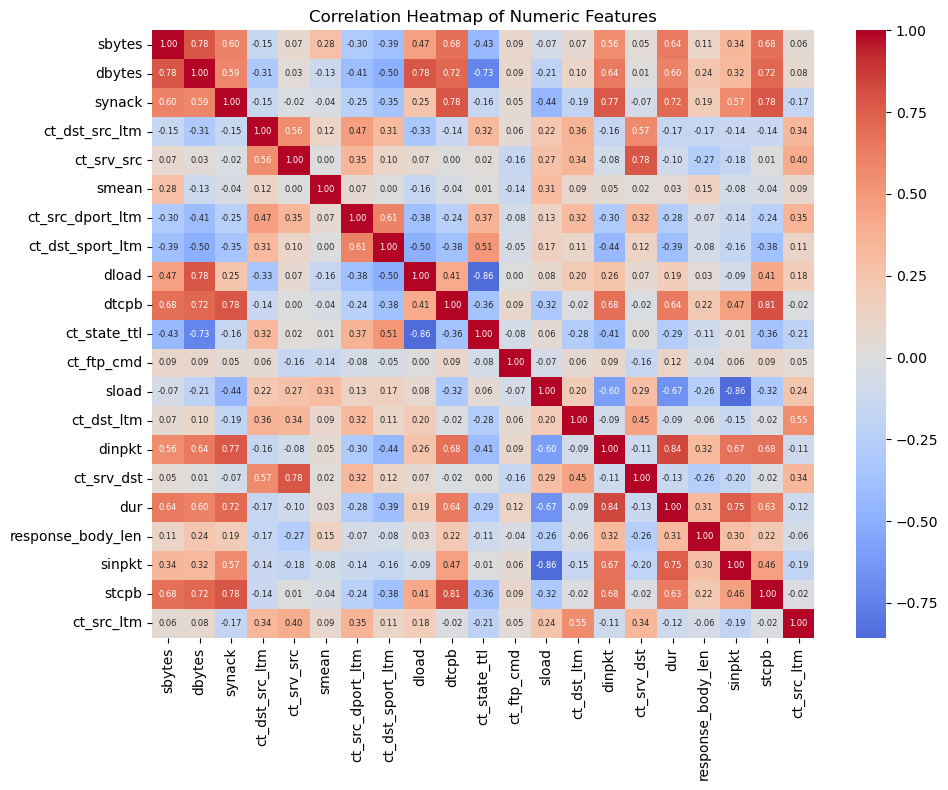

In [234]:
corr_mat_selected = X_train_selected[num_features_selected].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat_selected, annot=True, cmap='coolwarm', center=0, fmt=".2f", annot_kws={"size": 6})
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

### Feature importance

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [236]:
X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(
    X_train_selected,
    y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=123
)

In [237]:
rf = RandomForestClassifier(class_weight='balanced', random_state=123)

In [238]:
param_grid = {
    'n_estimators': [1000, 1500],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15]
}

In [239]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [240]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'auc': make_scorer(roc_auc_score)
}

In [241]:
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1',
    n_jobs=-1
)

In [242]:
grid.fit(X_subtrain, y_subtrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'min_samples_split': [10, 15],
                         'n_estimators': [1000, 1500]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'auc': make_scorer(roc_auc_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict', pos_label=1),
                      'precision': make_scorer(precision_score, response_method='predict', pos_label=1),
                      'recall': make_scorer(recall_score, response_method='predict', pos_label=1)})

In [243]:
rf_cv_results_df = pd.DataFrame(grid.cv_results_)

In [244]:
rf_cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,...,std_test_f1,rank_test_f1,split0_test_auc,split1_test_auc,split2_test_auc,split3_test_auc,split4_test_auc,mean_test_auc,std_test_auc,rank_test_auc
0,55.616994,1.070810,1.011328,0.042317,3,10,1000,"{'max_depth': 3, 'min_samples_split': 10, 'n_e...",0.945162,0.946255,...,0.005428,8,0.952849,0.955500,0.955007,0.949086,0.955457,0.953580,0.002448,8
1,82.626013,2.537831,1.406388,0.040197,3,10,1500,"{'max_depth': 3, 'min_samples_split': 10, 'n_e...",0.945162,0.947629,...,0.002434,5,0.952650,0.956337,0.953238,0.951733,0.957156,0.954223,0.002131,5
2,54.170591,1.215969,1.065576,0.209196,3,15,1000,"{'max_depth': 3, 'min_samples_split': 15, 'n_e...",0.945162,0.946255,...,0.005422,7,0.952849,0.955500,0.955007,0.949086,0.955656,0.953620,0.002480,7
3,78.573312,1.569015,1.249226,0.054124,3,15,1500,"{'max_depth': 3, 'min_samples_split': 15, 'n_e...",0.945162,0.947629,...,0.002434,5,0.952650,0.956337,0.953238,0.951733,0.957156,0.954223,0.002131,5
4,72.260649,1.755916,1.139842,0.050230,5,10,1000,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.977113,0.974455,...,0.003496,4,0.980082,0.980450,0.978540,0.977822,0.980030,0.979385,0.001019,4
5,100.924013,1.780997,1.419953,0.189855,5,10,1500,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.976929,0.974821,...,0.002918,2,0.979970,0.980872,0.978707,0.978411,0.980595,0.979711,0.000989,1
6,69.796473,1.373136,1.176001,0.073900,5,15,1000,"{'max_depth': 5, 'min_samples_split': 15, 'n_e...",0.977204,0.974272,...,0.003562,3,0.980138,0.980537,0.978540,0.977933,0.980539,0.979537,0.001089,3
7,74.875349,11.132878,0.804517,0.147189,5,15,1500,"{'max_depth': 5, 'min_samples_split': 15, 'n_e...",0.977204,0.974638,...,0.002843,1,0.980138,0.980761,0.978197,0.978603,0.980651,0.979670,0.001066,2


In [245]:
print("Best parameters:", grid.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_split': 15, 'n_estimators': 1500}


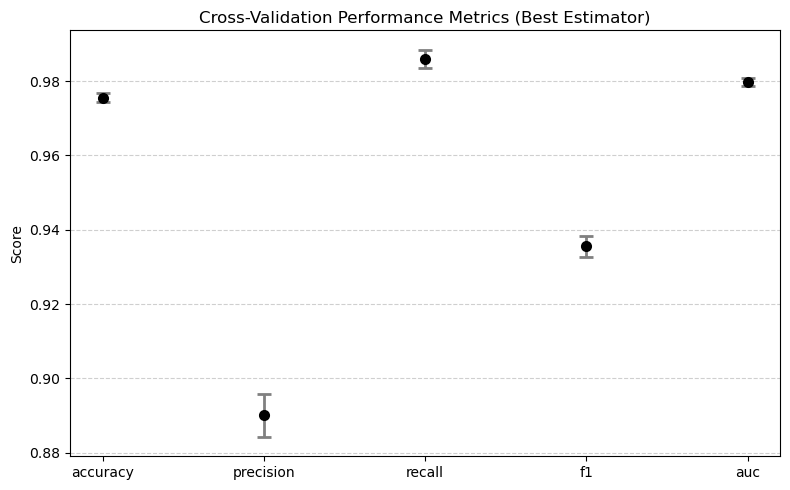

In [246]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']

best_idx = rf_cv_results_df['rank_test_f1'].idxmin()
best_row = rf_cv_results_df.loc[best_idx]

means = [best_row[f'mean_test_{m}'] for m in metrics]
stds = [best_row[f'std_test_{m}'] for m in metrics]

plt.figure(figsize=(8, 5))
plt.errorbar(
    metrics, means, yerr=stds, fmt='o', capsize=5, color='black', ecolor='grey', elinewidth=2, markeredgewidth=2
)
plt.ylabel('Score')
plt.title('Cross-Validation Performance Metrics (Best Estimator)')
#plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [247]:
best_rf_model = grid.best_estimator_

In [248]:
from sklearn.inspection import permutation_importance

In [249]:
perm_result = permutation_importance(
    best_rf_model,
    X_valid,
    y_valid,
    n_repeats=10,
    random_state=123,
    scoring='f1'
)

In [250]:
perm_df = pd.DataFrame({
    'feature': X_valid.columns,
    'mean_importance': perm_result.importances_mean,
    'std_importance': perm_result.importances_std
}).sort_values(by='mean_importance', ascending=False)

In [251]:
perm_df.head()

,feature,mean_importance,std_importance
10,smean,0.025120,0.000757
24,proto_udp,0.022783,0.001031
1,sbytes,0.012296,0.000753
3,sload,0.006365,0.000408
12,ct_srv_src,0.005313,0.000785


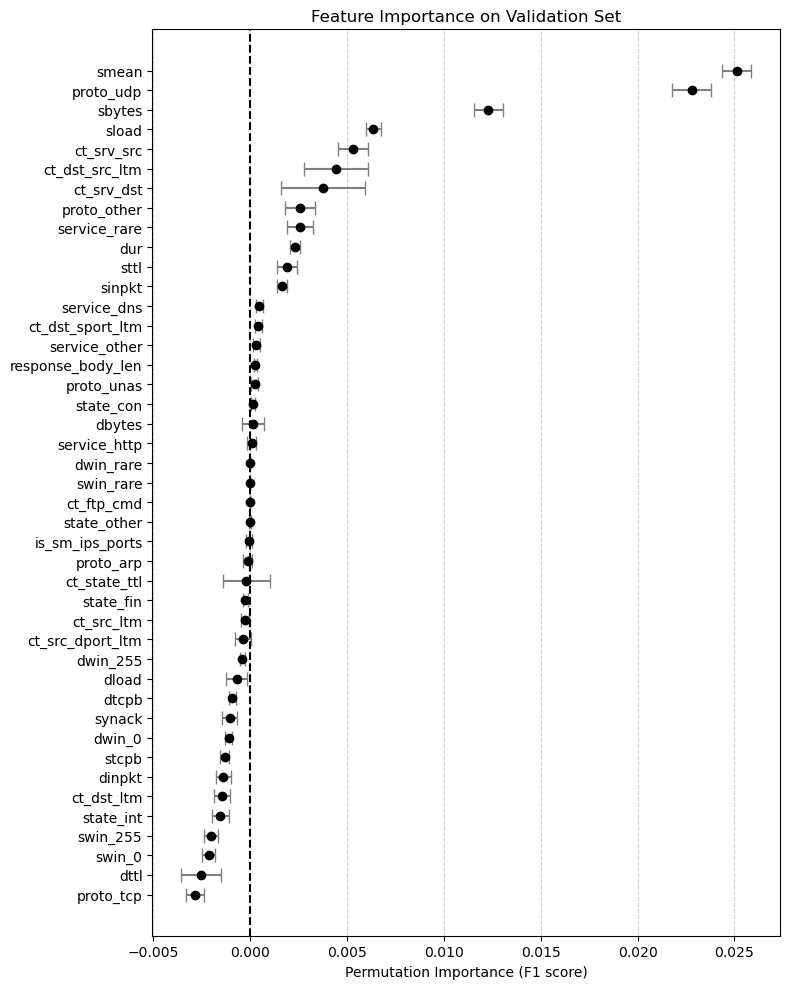

In [252]:
plt.figure(figsize=(8, 10))
plt.errorbar(
    x=perm_df['mean_importance'],
    y=perm_df['feature'],
    xerr=perm_df['std_importance'],
    fmt='o',
    capsize=5,
    color='black',
    ecolor='gray'
)
plt.gca().invert_yaxis()
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Permutation Importance (F1 score)')
plt.title('Feature Importance on Validation Set')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [253]:
onehot_groups = {
    'proto': 'proto',
    'state': 'state',
    'service': 'service'
}

In [254]:
def map_to_original(feature_name):
    for prefix, base in onehot_groups.items():
        if feature_name.startswith(prefix + '_'):
            return base
    return feature_name

In [255]:
perm_original_df = perm_df.copy()
perm_original_df['original_feature'] = perm_df['feature'].apply(map_to_original)

In [256]:
grouped_importance = (
    perm_original_df.groupby('original_feature')
           .agg(mean_importance=('mean_importance', 'mean'))
           .sort_values('mean_importance', ascending=False)
)

In [257]:
top_10_base_features = grouped_importance.head(5).index.tolist()
print(top_10_base_features)

['smean', 'sbytes', 'sload', 'ct_srv_src', 'proto']


In [258]:
def keep_feature(colname):
    for feature in top_10_base_features:
        if colname == feature or colname.startswith(feature + '_'):
            return True
    return False

In [259]:
selected_features = [col for col in X_train_selected.columns if keep_feature(col)]

In [260]:
X_train_top10 = X_train_selected[selected_features]
X_test_top10 = X_test_selected[selected_features]

In [261]:
y_train = y_train.reset_index(drop=True)
X_train_top10 = X_train_top10.reset_index(drop=True)

y_test = y_test.reset_index(drop=True)
X_test_top10 = X_test_top10.reset_index(drop=True)

In [262]:
train_final = pd.concat([y_train, X_train_top10], axis=1)
test_final = pd.concat([y_test, X_test_top10], axis=1)

In [263]:
import os
os.makedirs("data/interim", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)

In [264]:
train_final.to_csv("data/interim/train.csv", index=False)
test_final.to_csv("data/processed/test.csv", index=False)